<h1> Study Study Data Analysis 2023 </h1>

In [572]:
#Update File Path for SLIMS data
accession_file = "Resources/2023_Execution_Study_Raw_Dataset.csv"

In [573]:
#Import dependencies
import pandas as pd
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from matplotlib.colors import ListedColormap
import datetime
from datetime import date,timedelta

In [574]:
#Reference file that we are analyzing
Study_Path_Accession = Path(accession_file)
Study_RawData_Accession = pd.read_csv(Study_Path_Accession, skiprows=[0,1],low_memory=False)

#Show header of file
Study_RawData_Accession.head()

#Show information of dataset in file
Study_RawData_Accession.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15417 entries, 0 to 15416
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Instrument (nstr_name)      1 non-null      object 
 1   <SLIMSGUID>                 15416 non-null  object 
 2   Created on                  15416 non-null  object 
 3   Modified by                 15416 non-null  object 
 4   Modified on                 15416 non-null  object 
 5   Original Content (cntn_id)  15416 non-null  object 
 6   Category (cntp_name)        15416 non-null  object 
 7   Type (cntp_name)            15416 non-null  object 
 8   SLIMS Unique ID             15416 non-null  object 
 9   Id                          15416 non-null  object 
 10  Dilution Factor             0 non-null      float64
 11  Status (stts_name)          15416 non-null  object 
 12  Original tube type          0 non-null      float64
 13  Tube Type                   154

<h2> Clean up Dataset </h2>

In [575]:
#Creating new dataframe based on relevant columns
Study_Data = pd.DataFrame(Study_RawData_Accession,columns=[
    "Created on",
    "Original Content (cntn_id)",
    "Id",
    "Status (stts_name)",
    "Subject ID",
    "FlashLink Present",
    "FlashLink Alarm Triggered",
    "FlashLink Serial Number",
    "Temp Sensor Present",
    "Temp Sensor Trip Duration",
    "Nanocool Kit Present",
    "Nanocool Kit Activated"                                                                   
    ])

#Shows the first 5 rows of the dataframe
Study_Data.head()

#Fill NaN with 0
Study_Data.fillna(0,inplace=True)

#See the new Dataframe
Study_Data.head()

,Created on,Original Content (cntn_id),Id,Status (stts_name),Subject ID,FlashLink Present,FlashLink Alarm Triggered,FlashLink Serial Number,Temp Sensor Present,Temp Sensor Trip Duration,Nanocool Kit Present,Nanocool Kit Activated
0,2023-01-01,X000001X,X000001X01,Accepted,101-0001,True,False,123000001.0,True,0.0,True,True
1,2023-01-04,X000001X,X000001X04,Accepted,101-0004,True,False,123000001.0,True,0.0,True,True
2,2023-01-05,X000001X,X000001X05,Failed,101-0005,True,False,123000001.0,True,0.0,True,True
3,2023-01-08,X000002X,X000002X03,Failed,101-0008,True,False,123000001.0,True,0.0,False,False
4,2023-01-09,X000002X,X000002X04,Failed,101-0009,True,False,123000001.0,True,0.0,False,False


<h1>Created a function that eliminates unwanted rows </h1>

In [576]:
#Defining a formula that elimates rows with 0
def filter_rows_by_variable(df, col, values):
    return df[~df[col].isin(values)]

<h1> Check for missing Subject IDs at the Kits & Accession ID level</h1>

In [577]:
Study_Missing_Subject_ID = Study_Data[(Study_Data["Subject ID"]).index.duplicated()]

if (Study_Missing_Subject_ID.size > 0):
    print([(Study_Missing_Subject_ID["Subject ID"]).unique()])
else:
    print("----------------------------------------------------------------")
    print("There are no missing Subject ID's amongst Kits or Accession IDs.")
    print("All entries have subject ID")
    print("----------------------------------------------------------------")

----------------------------------------------------------------
There are no missing Subject ID's amongst Kits or Accession IDs.
All entries have subject ID
----------------------------------------------------------------


In [578]:
#Copy Cleaned Dataset, we do not want to mess with the clean dataset
Study_Sites_Samples = Study_Data["Subject ID"].copy()

#Drop rows that have the value FALSE
Study_Sites_Samples_Unique = Study_Sites_Samples_Unique.drop(Study_Sites_Samples_Unique[Study_Sites_Samples_Unique == 'FALSE'].index)

#Drop duplicates in list
Study_Sites_Samples_Unique = Study_Sites_Samples.drop_duplicates()

#Drop nan
Study_Sites_Samples_Unique = Study_Sites_Samples_Unique.drop(Study_Sites_Samples_Unique[Study_Sites_Samples_Unique == 'nan'].index)

Study_Sites_Samples_Unique

0        101-0001
1        101-0004
2        101-0005
3        101-0008
4        101-0009
           ...   
15412    112-2659
15413    112-2660
15414    112-2661
15415    112-2662
15416    112-2663
Name: Subject ID, Length: 11789, dtype: object

In [579]:
#Changing column to string then splitting the Subject ID into Site and Patient ID
Study_Sites_Samples_Unique.to_string()

#Split columns
Study_Sites_Samples_Unique = Study_Sites_Samples_Unique.str.split(pat="-",expand=True)

#Renaming Columns
mapping = {Study_Sites_Samples_Unique.columns[0]:"Site", Study_Sites_Samples_Unique.columns[1]:"Patient ID"}
Study_Sites_Samples_Unique.rename(columns=mapping)

Study_Sites_Samples_Unique.head()


,0,1
0,101,0001
1,101,0004
2,101,0005
3,101,0008
4,101,0009


In [580]:
#Group the Dataframe by Unique IDs and get a count of how many samples per Site
Study_Sites = Study_Sites_Samples_Unique.groupby(Study_Sites_Samples_Unique.columns[0]).count()

#Create a variable for total samples
Total_Samples_2023 = Study_Sites.sum()

#Seeing total number of samples per sites for reference
print(f"Total Patients in Study {Total_Samples_2023}")

#See dataframe
Study_Sites

Total Patients in Study 1    11788
dtype: int64


,1
0,
101,835
102,557
103,501
104,946
108,558
109,2237
110,976
111,2515
112,2663


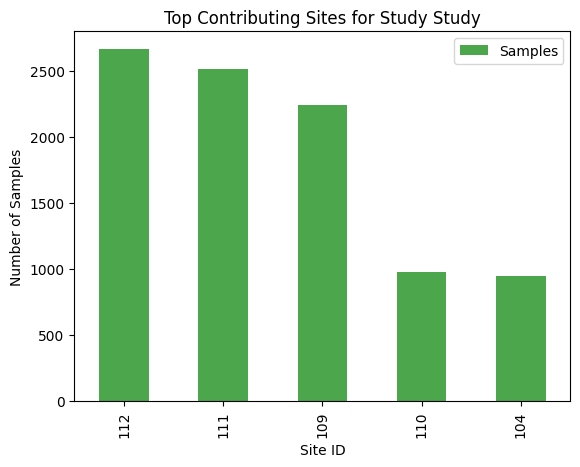

In [581]:
Sites_most_samples = Study_Sites.sort_values(by=Study_Sites.columns[0],ascending=False).head(5)

Sites_most_samples.plot.bar(color="g",alpha=0.7)

#Labeling Graph
plt.xlabel('Site ID')
plt.ylabel('Number of Samples')
plt.title('Top Contributing Sites for Study Study')    
plt.legend(["Samples"])
#plt.savefig(f"{save_file}/01_Most_Contributing_Sites.png")
plt.show()

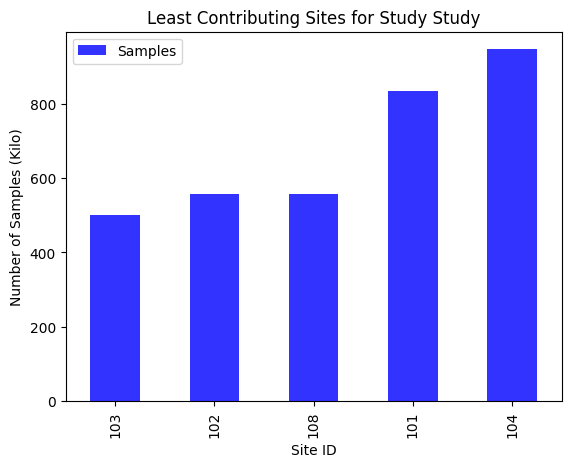

In [582]:
Sites_most_samples = Study_Sites.sort_values(by=Study_Sites.columns[0],ascending=True).head(5)

Sites_most_samples.plot.bar(color="b",alpha=0.8)

#Labeling Graph
plt.xlabel('Site ID')
plt.ylabel('Number of Samples (Kilo)')
plt.title('Least Contributing Sites for Study Study')    
plt.legend(["Samples"])

#plt.savefig("2023 Data Plots/02_Least_Contributing_Sites.png")
plt.show()

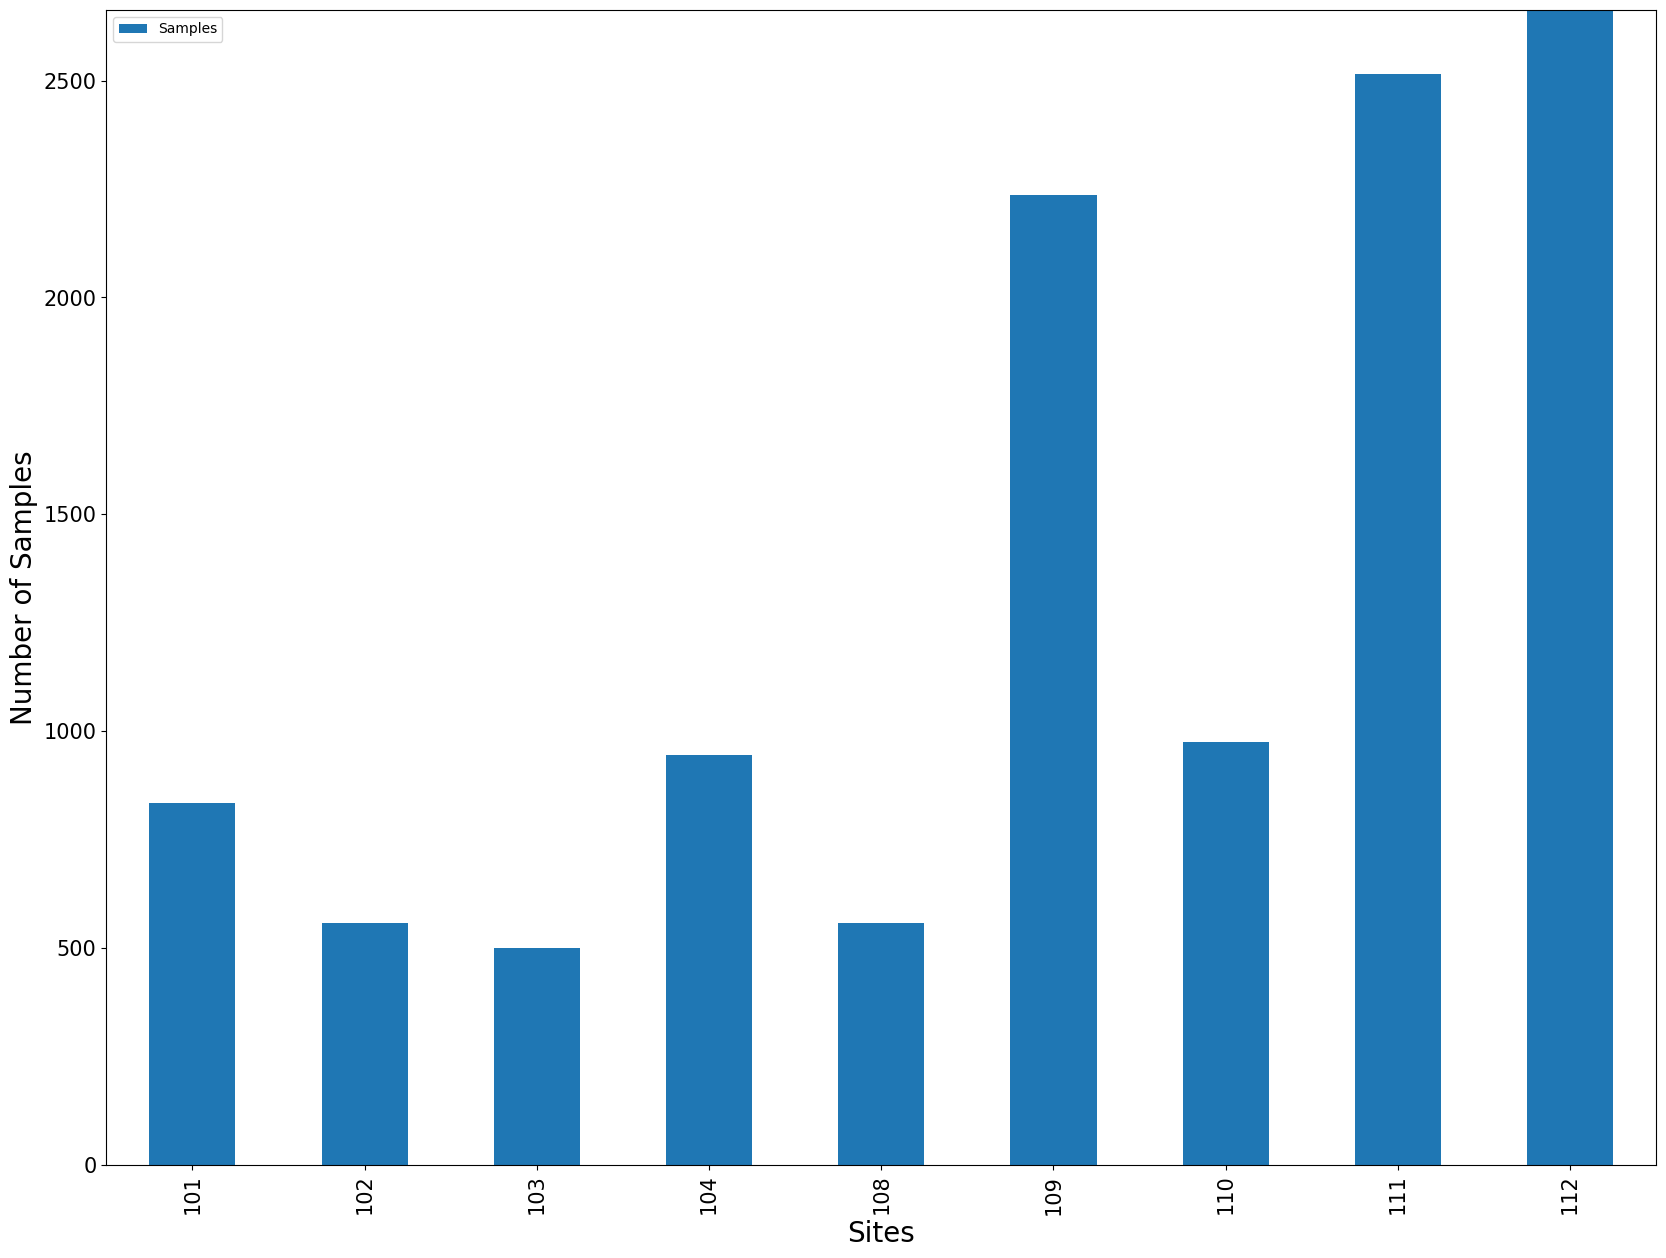

In [583]:
#Graph Samples into Bar Graph
#plt.rcParams["figure.figsize"] = [20, 10]
#plt.rcParams["figure.autolayout"] = True

Study_Sites.plot.bar(figsize=(20,15))
#Editing the ticks of the axis

plt.tick_params(axis='y', which='major', labelsize=15)
plt.tick_params(axis='x', which='major', labelsize=15)

plt.xlabel('Sites',fontsize=20)
plt.ylabel('Number of Samples',fontsize=20)

plt.margins(x=0, y=0)
plt.legend(["Samples"])

#plt.savefig("2023 Data Plots/03_Samples_Per_Site.png")

<h1> Timeline of Samples </h1>

In [584]:
#Copying Clean Dataset
Study_Date_Samples = Study_Data.copy()

#Splitting the single column into multiple columns
Study_Date_Samples[["Year","Month","Day"]]=Study_Date_Samples["Created on"].str.split("-",expand = True)

#Deleting the columns w/ duplicates
del Study_Date_Samples["Created on"]
del Study_Date_Samples["Original Content (cntn_id)"]
del Study_Date_Samples["Status (stts_name)"]
del Study_Date_Samples["Subject ID"]

Study_Date_Samples

,Id,FlashLink Present,FlashLink Alarm Triggered,FlashLink Serial Number,Temp Sensor Present,Temp Sensor Trip Duration,Nanocool Kit Present,Nanocool Kit Activated,Year,Month,Day
0,X000001X01,True,False,123000001.0,True,0.0,True,True,2023,01,01
1,X000001X04,True,False,123000001.0,True,0.0,True,True,2023,01,04
2,X000001X05,True,False,123000001.0,True,0.0,True,True,2023,01,05
3,X000002X03,True,False,123000001.0,True,0.0,False,False,2023,01,08
4,X000002X04,True,False,123000001.0,True,0.0,False,False,2023,01,09
...,...,...,...,...,...,...,...,...,...,...,...
15412,X003569X02,True,False,123000001.0,False,0.0,False,False,2023,04,30
15413,X003570X01,True,False,123000001.0,False,0.0,False,False,2023,05,01
15414,X003571X02,True,False,123000001.0,False,0.0,False,False,2023,05,02
15415,X003572X03,True,False,123000001.0,False,0.0,False,False,2023,05,03


<h3>Grouping by Year and Month to Create a Linear Time Graph</h3>

In [585]:
#Creating a copy and cleaning up table
Study_Date_Samples1 = Study_Date_Samples.set_index("Month", inplace=False,drop=True)

#Group by Months and count the total number of samples per month
Study_Date_Samples_Month = Study_Date_Samples1.groupby(["Month"]).count()
del Study_Date_Samples_Month["Day"]
del Study_Date_Samples_Month["Year"]
del Study_Date_Samples_Month["FlashLink Present"]
del Study_Date_Samples_Month["FlashLink Alarm Triggered"]
del Study_Date_Samples_Month["FlashLink Serial Number"]
del Study_Date_Samples_Month["Temp Sensor Present"]
del Study_Date_Samples_Month["Nanocool Kit Present"]
del Study_Date_Samples_Month["Nanocool Kit Activated"]
del Study_Date_Samples_Month["Temp Sensor Trip Duration"]


Study_Date_Samples_Month

,Id
Month,
01,1360
02,1224
03,1339
04,1291
05,1284
06,1224
07,1292
08,1271
09,1230


Text(0.5, 0, 'Month')

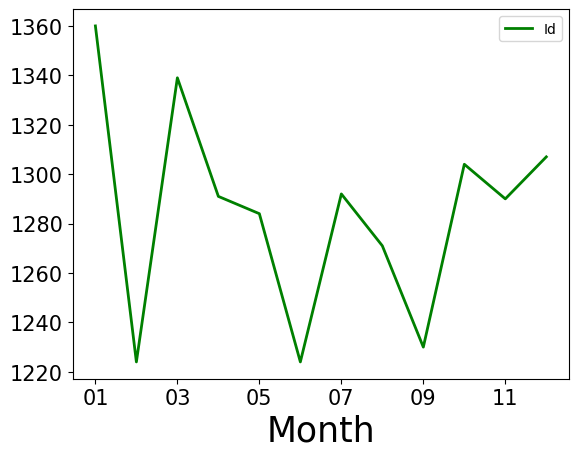

In [586]:
Study_Date_Samples_Month.plot(color="g", lw=2)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel('Month',fontsize=25)
#plt.savefig("2023 Data Plots/04_Samples_Per_Month.png")

<h2>Samples Per Quarter</h2>

In [587]:
Study_Date_Month = Study_Date_Samples.copy()

#Create bins for the quarter values
quarter=[0,3,6,9,12]
quarter_labels = ["Q1","Q2","Q3","Q4"]

#Creating a value that tells us how many rows there are. Starting number is 0
index_num = len(Study_Date_Month) - 1

#Creates a Dataframe based on the number of months in dataset
Study_Date_Samples_Month_index = Study_Date_Month.iloc[:,0: index_num]

#Convert to dataframe
Study_Date_Samples_Month_Read = pd.DataFrame(Study_Date_Samples_Month_index)

#Reset index
Study_Date_Samples_Month_Read = Study_Date_Samples_Month_Read .reset_index()

#Drop NaN
Study_Date_Samples_Month_Read = Study_Date_Samples_Month_Read.dropna()

#Convert column to int
Study_Date_Samples_Month_Read['Month'] = Study_Date_Samples_Month_Read['Month'].astype(int)

#Put the months into bins
Study_Date_Samples_Month_Read["Month"] = pd.cut(Study_Date_Samples_Month_Read["Month"], bins=quarter, labels= quarter_labels)

#Groupby
Study_Quarters = Study_Date_Samples_Month_Read.groupby(['Month']).count()

#Delete columns
del Study_Quarters['Year']
del Study_Quarters['Day']
del Study_Quarters['Id']
del Study_Quarters["FlashLink Present"]
del Study_Quarters["FlashLink Alarm Triggered"]
del Study_Quarters["FlashLink Serial Number"]
del Study_Quarters["Temp Sensor Present"]
del Study_Quarters["Nanocool Kit Present"]
del Study_Quarters["Nanocool Kit Activated"]
del Study_Quarters["Temp Sensor Trip Duration"]

Study_Quarters

,index
Month,
Q1,3923
Q2,3799
Q3,3793
Q4,3901


Text(252.52222222222224, 0.5, 'Quarter')

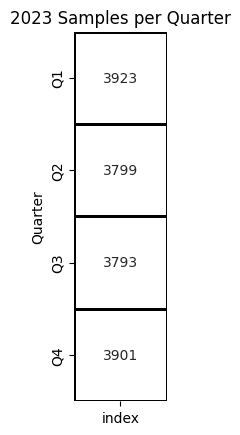

In [588]:
plt.figure(facecolor="w")
sns.heatmap(Study_Quarters,
            annot=True,
            cmap=ListedColormap(['white']),
            linecolor="black",
            linewidth=1,
            fmt='g',
            square=True,
            cbar=False)
plt.title("2023 Samples per Quarter")
plt.ylabel("Quarter")
#plt.savefig("2023 Data Plots/16_2023_Samples_Per_Quarter.png")

Text(0.5, 0, 'Quarter')

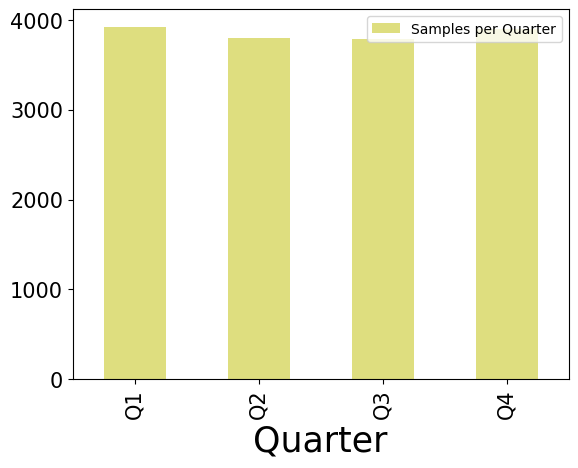

In [589]:
Study_Quarters.plot.bar(color="y", alpha=0.5)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.legend(["Samples per Quarter"])
plt.xlabel('Quarter',fontsize=25)
#plt.savefig("2023 Data Plots/05_Samples_Per_Quarter.png")

<h2>Samples Per Month</h2>

Text(0, 0.5, 'Number of Samples')

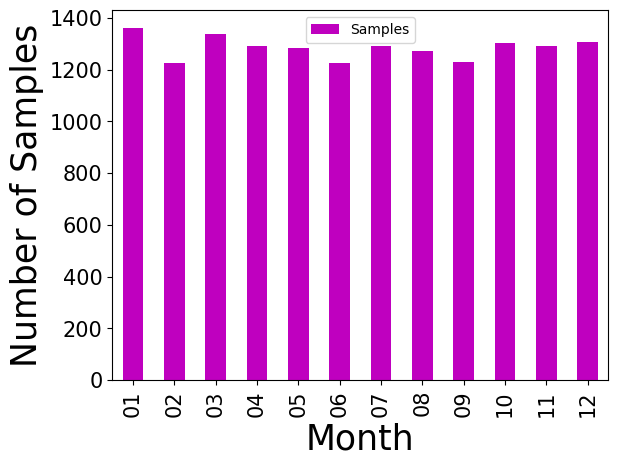

In [590]:
Study_Date_Samples_Month.plot.bar(color="m")
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tick_params(axis='x', which='major', labelsize=15)

plt.legend(["Samples"])

plt.xlabel('Month',fontsize=25)
plt.ylabel('Number of Samples',fontsize=25)

#plt.savefig("2023 Data Plots/05_Samples_Per_Quarter.png")

<h2>Patients Per Quarter Per Day</h2>

In [591]:
#Import calender module to align days with day of the week
import calendar

Study_Date_Daily = Study_Date_Samples.reset_index()

#Put together the full date of the accession ID
Study_Date_Daily["Date"] = Study_Date_Daily["Month"]+"/"+Study_Date_Daily["Day"]+"/"+Study_Date_Daily["Year"]
#Convert dataframe to datetime
Study_Date_Daily["Date"]= pd.to_datetime(Study_Date_Daily["Date"], yearfirst=True, infer_datetime_format = True)

#Create new column that shows day of week
Study_Date_Daily["Day of Week"] = Study_Date_Daily["Date"].dt.dayofweek

#Rename the numbers with the name of the day
Study_Date_Daily["Day of Week"] = Study_Date_Daily["Day of Week"].map({
    0: '1: Monday',
    1: '2: Tuesday',
    2: '3: Wednesday',
    3: '4: Thursday',
    4: '5: Friday',
    5: '6: Saturday',
    6: '7: Sunday'
})

Study_Date_Daily

,index,Id,FlashLink Present,FlashLink Alarm Triggered,FlashLink Serial Number,Temp Sensor Present,Temp Sensor Trip Duration,Nanocool Kit Present,Nanocool Kit Activated,Year,Month,Day,Date,Day of Week
0,0,X000001X01,True,False,123000001.0,True,0.0,True,True,2023,01,01,2023-01-01,7: Sunday
1,1,X000001X04,True,False,123000001.0,True,0.0,True,True,2023,01,04,2023-01-04,3: Wednesday
2,2,X000001X05,True,False,123000001.0,True,0.0,True,True,2023,01,05,2023-01-05,4: Thursday
3,3,X000002X03,True,False,123000001.0,True,0.0,False,False,2023,01,08,2023-01-08,7: Sunday
4,4,X000002X04,True,False,123000001.0,True,0.0,False,False,2023,01,09,2023-01-09,1: Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,15412,X003569X02,True,False,123000001.0,False,0.0,False,False,2023,04,30,2023-04-30,7: Sunday
15413,15413,X003570X01,True,False,123000001.0,False,0.0,False,False,2023,05,01,2023-05-01,1: Monday
15414,15414,X003571X02,True,False,123000001.0,False,0.0,False,False,2023,05,02,2023-05-02,2: Tuesday
15415,15415,X003572X03,True,False,123000001.0,False,0.0,False,False,2023,05,03,2023-05-03,3: Wednesday


In [592]:
Study_Date_Daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15417 entries, 0 to 15416
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      15417 non-null  int64         
 1   Id                         15417 non-null  object        
 2   FlashLink Present          15417 non-null  object        
 3   FlashLink Alarm Triggered  15417 non-null  object        
 4   FlashLink Serial Number    15417 non-null  float64       
 5   Temp Sensor Present        15417 non-null  object        
 6   Temp Sensor Trip Duration  15417 non-null  float64       
 7   Nanocool Kit Present       15417 non-null  object        
 8   Nanocool Kit Activated     15417 non-null  object        
 9   Year                       15416 non-null  object        
 10  Month                      15416 non-null  object        
 11  Day                        15416 non-null  object        
 12  Date

In [593]:
#------------------------------------------------------
#Create bins for the quarter values
#Note: quarter=[0,3,6,9,12]
#Note: quarter_labels = ["Q1","Q2","Q3","Q4"]
#-------------------------------------------------------
#Drop na values
Study_Date_Daily = Study_Date_Daily.dropna()

Study_Date_Daily["Month"] = Study_Date_Daily["Month"].astype(int)

#Bin by Quarter by Month & Cleanup dataframe
Study_Date_Daily["Month"] = pd.cut(Study_Date_Daily["Month"], bins=quarter, labels= quarter_labels)
#del Study_Date_Daily["Unnamed: 0"]
del Study_Date_Daily["Year"]
del Study_Date_Daily["Day"]

Study_Date_Daily

/tmp/ipykernel_14081/789721950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Study_Date_Daily["Month"] = Study_Date_Daily["Month"].astype(int)
/tmp/ipykernel_14081/789721950.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Study_Date_Daily["Month"] = pd.cut(Study_Date_Daily["Month"], bins=quarter, labels= quarter_labels)


,index,Id,FlashLink Present,FlashLink Alarm Triggered,FlashLink Serial Number,Temp Sensor Present,Temp Sensor Trip Duration,Nanocool Kit Present,Nanocool Kit Activated,Month,Date,Day of Week
0,0,X000001X01,True,False,123000001.0,True,0.0,True,True,Q1,2023-01-01,7: Sunday
1,1,X000001X04,True,False,123000001.0,True,0.0,True,True,Q1,2023-01-04,3: Wednesday
2,2,X000001X05,True,False,123000001.0,True,0.0,True,True,Q1,2023-01-05,4: Thursday
3,3,X000002X03,True,False,123000001.0,True,0.0,False,False,Q1,2023-01-08,7: Sunday
4,4,X000002X04,True,False,123000001.0,True,0.0,False,False,Q1,2023-01-09,1: Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
15412,15412,X003569X02,True,False,123000001.0,False,0.0,False,False,Q2,2023-04-30,7: Sunday
15413,15413,X003570X01,True,False,123000001.0,False,0.0,False,False,Q2,2023-05-01,1: Monday
15414,15414,X003571X02,True,False,123000001.0,False,0.0,False,False,Q2,2023-05-02,2: Tuesday
15415,15415,X003572X03,True,False,123000001.0,False,0.0,False,False,Q2,2023-05-03,3: Wednesday


In [594]:
Study_Date_Daily_Group = Study_Date_Daily.groupby(["Month","Day of Week"]).agg(['count'])
del Study_Date_Daily_Group['Id']

Study_Date_Daily_Group.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 28 entries, ('Q1', '1: Monday') to ('Q4', '7: Sunday')
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   (index, count)                      28 non-null     int64
 1   (FlashLink Present, count)          28 non-null     int64
 2   (FlashLink Alarm Triggered, count)  28 non-null     int64
 3   (FlashLink Serial Number, count)    28 non-null     int64
 4   (Temp Sensor Present, count)        28 non-null     int64
 5   (Temp Sensor Trip Duration, count)  28 non-null     int64
 6   (Nanocool Kit Present, count)       28 non-null     int64
 7   (Nanocool Kit Activated, count)     28 non-null     int64
 8   (Date, count)                       28 non-null     int64
dtypes: int64(9)
memory usage: 2.4+ KB


In [595]:
#Study_Date_Daily['Date'] = [datetime.fromtimestamp(x) for x in Study_Date_Daily['Date']]

#Filter out the table by quarter
Study_Date_Daily_Q1 = Study_Date_Daily[(Study_Date_Daily["Month"]=="Q1")]
Study_Date_Daily_Q2 = Study_Date_Daily[(Study_Date_Daily["Month"]=="Q2")]
Study_Date_Daily_Q3 = Study_Date_Daily[(Study_Date_Daily["Month"]=="Q3")]
Study_Date_Daily_Q4 = Study_Date_Daily[(Study_Date_Daily["Month"]=="Q4")]

#Obtaining the Start & End Dates for each Quarter
Q1_Start = (Study_Date_Daily_Q1['Date'].min())
Q1_End = (Study_Date_Daily_Q1['Date'].max())

Q2_Start = (Study_Date_Daily_Q2['Date'].min())
Q2_End = (Study_Date_Daily_Q2['Date'].max())

Q3_Start = (Study_Date_Daily_Q3['Date'].min())
Q3_End = (Study_Date_Daily_Q3['Date'].max())

Q4_Start = (Study_Date_Daily_Q4['Date'].min())
Q4_End = (Study_Date_Daily_Q4['Date'].max())


#Q4_Start1 = datetime.datetime.strptime(str(Q4_Start), '%Y-%m-%d %H:%M:%S')

#Q4_End1 = datetime.datetime.strptime(str(Q4_End), '%Y-%m-%d %H:%M:%S')
(Q4_End)

#Dictionary of items
Q1_Weekdays = {}
Q2_Weekdays = {}
Q3_Weekdays = {}
Q4_Weekdays = {}

#Create a function that will tell you the number of week days in quarter
def weekday_count(start, end):
  start_date  = datetime.datetime.strptime(str(start), '%Y-%m-%d %H:%M:%S')
  end_date    = datetime.datetime.strptime(str(end), '%Y-%m-%d %H:%M:%S')
  week        = {}
  for i in range((end_date - start_date).days):
    day       = calendar.day_name[(start_date + datetime.timedelta(days=i+1)).weekday()]
    week[day] = week[day] + 1 if day in week else 1
  return week

#Add function output to dictionary
Q1_Weekdays = weekday_count(Q1_Start,Q1_End)
Q2_Weekdays = weekday_count(Q2_Start,Q2_End)
Q3_Weekdays = weekday_count(Q3_Start,Q3_End)
Q4_Weekdays = weekday_count(Q4_Start,Q4_End)
Q2_Weekdays

#Find the total amount of samples per week day
Study_Date_Daily_Q1 = Study_Date_Daily_Q1.groupby("Day of Week").count()
Study_Date_Daily_Q2 = Study_Date_Daily_Q2.groupby("Day of Week").count()
Study_Date_Daily_Q3 = Study_Date_Daily_Q3.groupby("Day of Week").count()
Study_Date_Daily_Q4 = Study_Date_Daily_Q4.groupby("Day of Week").count()

Study_Date_Daily_Q4

#Using iloc to select individual rows, we are able to divded the total of samples by the number of days in week
#Repeat for every quarter
Study_Date_Daily_Q1['Month'].iloc[0] = Study_Date_Daily_Q1["Id"].iloc[0]/(Q1_Weekdays.get('Monday'))
Study_Date_Daily_Q1['Month'].iloc[1] = Study_Date_Daily_Q1["Id"].iloc[1]/(Q1_Weekdays.get('Tuesday'))
Study_Date_Daily_Q1['Month'].iloc[2] = Study_Date_Daily_Q1["Id"].iloc[2]/(Q1_Weekdays.get('Wednesday'))
Study_Date_Daily_Q1['Month'].iloc[3] = Study_Date_Daily_Q1["Id"].iloc[3]/(Q1_Weekdays.get('Thursday'))
Study_Date_Daily_Q1['Month'].iloc[4] = Study_Date_Daily_Q1["Id"].iloc[4]/(Q1_Weekdays.get('Friday'))
Study_Date_Daily_Q1['Month'].iloc[5] = Study_Date_Daily_Q1["Id"].iloc[5]/(Q1_Weekdays.get('Saturday'))
Study_Date_Daily_Q1['Month'].iloc[6] = Study_Date_Daily_Q1["Id"].iloc[6]/(Q1_Weekdays.get('Sunday'))


Study_Date_Daily_Q2['Month'].iloc[0] = Study_Date_Daily_Q2["Id"].iloc[0]/(Q2_Weekdays.get('Monday'))
Study_Date_Daily_Q2['Month'].iloc[1] = Study_Date_Daily_Q2["Id"].iloc[1]/(Q2_Weekdays.get('Tuesday'))
Study_Date_Daily_Q2['Month'].iloc[2] = Study_Date_Daily_Q2["Id"].iloc[2]/(Q2_Weekdays.get('Wednesday'))
Study_Date_Daily_Q2['Month'].iloc[3] = Study_Date_Daily_Q2["Id"].iloc[3]/(Q2_Weekdays.get('Thursday'))
Study_Date_Daily_Q2['Month'].iloc[4] = Study_Date_Daily_Q2["Id"].iloc[4]/(Q2_Weekdays.get('Friday'))
Study_Date_Daily_Q2['Month'].iloc[5] = Study_Date_Daily_Q2["Id"].iloc[5]/(Q2_Weekdays.get('Saturday'))
Study_Date_Daily_Q2['Month'].iloc[6] = Study_Date_Daily_Q2["Id"].iloc[6]/(Q2_Weekdays.get('Sunday'))

Study_Date_Daily_Q3['Month'].iloc[0] = Study_Date_Daily_Q3["Id"].iloc[0]/(Q3_Weekdays.get('Monday'))
Study_Date_Daily_Q3['Month'].iloc[1] = Study_Date_Daily_Q3["Id"].iloc[1]/(Q3_Weekdays.get('Tuesday'))
Study_Date_Daily_Q3['Month'].iloc[2] = Study_Date_Daily_Q3["Id"].iloc[2]/(Q3_Weekdays.get('Wednesday'))
Study_Date_Daily_Q3['Month'].iloc[3] = Study_Date_Daily_Q3["Id"].iloc[3]/(Q3_Weekdays.get('Thursday'))
Study_Date_Daily_Q3['Month'].iloc[4] = Study_Date_Daily_Q3["Id"].iloc[4]/(Q3_Weekdays.get('Friday'))
Study_Date_Daily_Q3['Month'].iloc[5] = Study_Date_Daily_Q3["Id"].iloc[5]/(Q3_Weekdays.get('Saturday'))
Study_Date_Daily_Q3['Month'].iloc[6] = Study_Date_Daily_Q3["Id"].iloc[6]/(Q3_Weekdays.get('Sunday'))

Study_Date_Daily_Q4['Month'].iloc[0] = Study_Date_Daily_Q4["Id"].iloc[0]/(Q4_Weekdays.get('Monday'))
Study_Date_Daily_Q4['Month'].iloc[1] = Study_Date_Daily_Q4["Id"].iloc[1]/(Q4_Weekdays.get('Tuesday'))
Study_Date_Daily_Q4['Month'].iloc[2] = Study_Date_Daily_Q4["Id"].iloc[2]/(Q4_Weekdays.get('Wednesday'))
Study_Date_Daily_Q4['Month'].iloc[3] = Study_Date_Daily_Q4["Id"].iloc[3]/(Q4_Weekdays.get('Thursday'))
Study_Date_Daily_Q4['Month'].iloc[4] = Study_Date_Daily_Q4["Id"].iloc[4]/(Q4_Weekdays.get('Friday'))
Study_Date_Daily_Q4['Month'].iloc[5] = Study_Date_Daily_Q4["Id"].iloc[5]/(Q4_Weekdays.get('Saturday'))
Study_Date_Daily_Q4['Month'].iloc[6] = Study_Date_Daily_Q4["Id"].iloc[6]/(Q4_Weekdays.get('Sunday'))

#Reformat and clean table
Study_Date_Daily_Mean_Q1 = pd.DataFrame(Study_Date_Daily_Q1, columns=["Month"])
Study_Date_Daily_Mean_Q1 = Study_Date_Daily_Mean_Q1.round(1)
Study_Date_Daily_Mean_Q1 = Study_Date_Daily_Mean_Q1.rename(columns={'Month':'Q1'})
Study_Date_Daily_Mean_Q1      

Study_Date_Daily_Mean_Q2 = pd.DataFrame(Study_Date_Daily_Q2, columns=["Month"])
Study_Date_Daily_Mean_Q2 = Study_Date_Daily_Mean_Q2.round(1)
Study_Date_Daily_Mean_Q2 = Study_Date_Daily_Mean_Q2.rename(columns={'Month':'Q2'})
Study_Date_Daily_Mean_Q2 

Study_Date_Daily_Mean_Q3 = pd.DataFrame(Study_Date_Daily_Q3, columns=["Month"])
Study_Date_Daily_Mean_Q3 = Study_Date_Daily_Mean_Q3.round(1)
Study_Date_Daily_Mean_Q3 = Study_Date_Daily_Mean_Q3.rename(columns={'Month':'Q3'})
Study_Date_Daily_Mean_Q3 

Study_Date_Daily_Mean_Q4 = pd.DataFrame(Study_Date_Daily_Q4, columns=["Month"])
Study_Date_Daily_Mean_Q4 = Study_Date_Daily_Mean_Q4.round(1)
Study_Date_Daily_Mean_Q4 = Study_Date_Daily_Mean_Q4.rename(columns={'Month':'Q4'})


In [596]:
Study_Date_Daily_Mean_Q2 

,Q2
Day of Week,
1: Monday,41.8
2: Tuesday,41.8
3: Wednesday,41.8
4: Thursday,41.7
5: Friday,41.6
6: Saturday,45.3
7: Sunday,41.8


In [597]:
#Make a list of dataframes we created
Quarter_Dataframes = [Study_Date_Daily_Mean_Q1,Study_Date_Daily_Mean_Q2,Study_Date_Daily_Mean_Q3,Study_Date_Daily_Mean_Q4]

Study_Date_Daily_Mean_Merged = pd.concat(Quarter_Dataframes,axis=1)
Study_Date_Daily_Mean_Merged.fillna(0)

#plt.figure(facecolor="w")
#sns.heatmap(Study_Date_Daily_Mean_Merged,
#            annot=True,
#            cmap=ListedColormap(['white']),
#            linecolor="black",
#            linewidth=1,
#            cbar=False)
#plt.savefig("Clustermarket/Outputs Rendered/02_Alpha_Equipment_Usage_Table.png")

,Q1,Q2,Q3,Q4
Day of Week,,,,
1: Monday,43.6,41.8,41.2,42.5
2: Tuesday,43.5,41.8,41.2,42.5
3: Wednesday,43.6,41.8,41.2,42.4
4: Thursday,43.6,41.7,41.2,42.4
5: Friday,43.5,41.6,41.2,42.4
6: Saturday,43.5,45.3,44.4,42.4
7: Sunday,47.3,41.8,41.2,45.6


Text(0.5, 1.0, 'Average Amount of Samples/Day/Quarter')

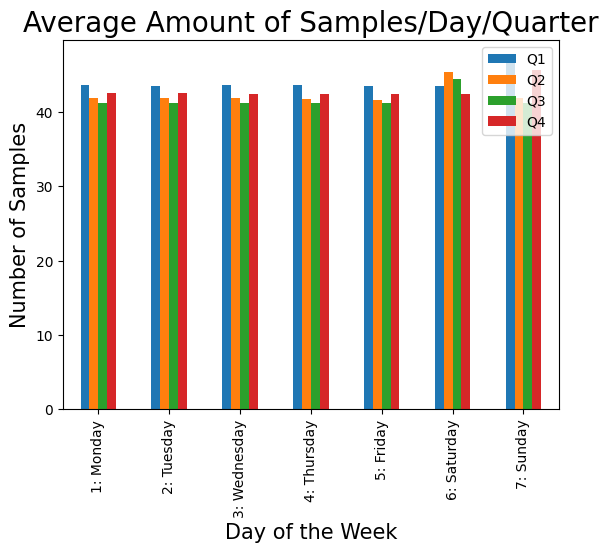

In [598]:
Study_Date_Daily_Mean_Merged.plot.bar()
plt.tick_params(axis='y', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.xlabel('Day of the Week',fontsize=15)
plt.ylabel('Number of Samples',fontsize=15)
plt.title('Average Amount of Samples/Day/Quarter',fontsize=20)   

#plt.savefig("2023 Data Plots/06_Samples_Per_Day_Per_Quarter.png")

<h1>TempSensor/Flashlink Data Analysis</h1>

In [675]:
#Create a new dataframe with only tempsensor data
Study_Flashlink_TempSensor = pd.DataFrame(Study_Data,columns=["Original Content (cntn_id)",
                                                                    "Subject ID",
                                                                    "Created on",
                                                                    "FlashLink Present",
                                                                    "FlashLink Alarm Triggered",
                                                                    "FlashLink Serial Number",
                                                                    "Temp Sensor Present",
                                                                    "Temp Sensor Trip Duration",
                                                                    "Nanocool Kit Present",
                                                                    "Nanocool Kit Activated"])

#Study_Flashlink_TempSensor = Study_Flashlink_TempSensor.drop_duplicates()
Study_Flashlink_TempSensor

,Original Content (cntn_id),Subject ID,Created on,FlashLink Present,FlashLink Alarm Triggered,FlashLink Serial Number,Temp Sensor Present,Temp Sensor Trip Duration,Nanocool Kit Present,Nanocool Kit Activated
0,X000001X,101-0001,2023-01-01,True,False,123000001.0,True,0.0,True,True
1,X000001X,101-0004,2023-01-04,True,False,123000001.0,True,0.0,True,True
2,X000001X,101-0005,2023-01-05,True,False,123000001.0,True,0.0,True,True
3,X000002X,101-0008,2023-01-08,True,False,123000001.0,True,0.0,False,False
4,X000002X,101-0009,2023-01-09,True,False,123000001.0,True,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...
15412,X003569X,112-2659,2023-04-30,True,False,123000001.0,False,0.0,False,False
15413,X003570X,112-2660,2023-05-01,True,False,123000001.0,False,0.0,False,False
15414,X003571X,112-2661,2023-05-02,True,False,123000001.0,False,0.0,False,False
15415,X003572X,112-2662,2023-05-03,True,False,123000001.0,False,0.0,False,False


In [676]:
#Confirming that every sample with Flashlink present has a Flashlink Serial Number associated with it
#Filter out the table by Flashlink Present
Study_Flashlink_Serial_Num_Check = Study_Flashlink_TempSensor[(Study_Flashlink_TempSensor["FlashLink Present"]==True)]
Study_Flashlink_Check = Study_Flashlink_Serial_Num_Check[(Study_Flashlink_Serial_Num_Check["FlashLink Serial Number"]==0)]
print("---------------------------------------------------------------------------")
print("These are the entries that have Flashlink set to Present")
print("But does not have a serial number associated with the sample")
print("Most likely, an accessioning operator error that needs to be corrected")
print("---------------------------------------------------------------------------")
Study_Flashlink_Check

---------------------------------------------------------------------------
These are the entries that have Flashlink set to Present
But does not have a serial number associated with the sample
Most likely, an accessioning operator error that needs to be corrected
---------------------------------------------------------------------------


,Original Content (cntn_id),Subject ID,Created on,FlashLink Present,FlashLink Alarm Triggered,FlashLink Serial Number,Temp Sensor Present,Temp Sensor Trip Duration,Nanocool Kit Present,Nanocool Kit Activated


In [677]:
Study_Flashlink = Study_Flashlink_TempSensor[(Study_Flashlink_TempSensor["FlashLink Present"]==True)]
Flashlink_total = Study_Flashlink["FlashLink Present"].count()

Study_Flashlink_with_Tempsensor = Study_Flashlink[(Study_Flashlink["Temp Sensor Present"]==True)]
Flashlink_with_Tempsensor_total = Study_Flashlink_with_Tempsensor["FlashLink Present"].count()
Flashlink_only = Flashlink_total - Flashlink_with_Tempsensor_total

Study_Nanocool = Study_Flashlink_TempSensor[(Study_Flashlink_TempSensor["Nanocool Kit Present"]==True)]
Study_Nanocool_w_Tempsensor = Study_Nanocool[(Study_Nanocool["Temp Sensor Present"]==True)]
#All samples that came with nanocool have temp sensors
Nanocool_total = Study_Nanocool["Nanocool Kit Present"].count()
Nanocool_w_TempSensor = Study_Nanocool_w_Tempsensor["Temp Sensor Present"].count()
Nanocool_only = Nanocool_total - Nanocool_w_TempSensor

Study_Tempsensor = Study_Flashlink_TempSensor[(Study_Flashlink_TempSensor["Temp Sensor Present"]==True)]
Tempsensor_total = Study_Tempsensor["Temp Sensor Present"].count()
Tempsensor_only = Tempsensor_total - Nanocool_w_TempSensor - Flashlink_with_Tempsensor_total

#Print results to verifiy correct counts
print("Number of Samples w/ Both Flashlinks & Tempsensors: "+str(Flashlink_with_Tempsensor_total))
print("Number of Samples w/ only Flashlinks: "+str(Flashlink_only))
print("Total Samples w/ only Tempsensors: "+str(Tempsensor_only))
print("Total Samples w/ only Nanocools: "+str(Nanocool_only))
print("Total Samples w/ Nanocools & TempSensor: "+str(Nanocool_w_TempSensor))
print("Number of Samples w/ only Tempsensors: "+str(Tempsensor_only))
print("-"*60)
print("Total Samples w/ Temperature Device: "+str(Flashlink_with_Tempsensor_total
                                                  +Flashlink_only
                                                  +Tempsensor_only
                                                  +Nanocool_only
                                                  +Nanocool_w_TempSensor))

Number of Samples w/ Both Flashlinks & Tempsensors: 704
Number of Samples w/ only Flashlinks: 4318
Total Samples w/ only Tempsensors: 8011
Total Samples w/ only Nanocools: 82
Total Samples w/ Nanocools & TempSensor: 1461
Number of Samples w/ only Tempsensors: 8011
------------------------------------------------------------
Total Samples w/ Temperature Device: 14576


In [678]:
Flashlink_Tempsensor_Summary=pd.DataFrame({
    #"Total":[Total_Samples_2023],
    "Flashlinks only":[Flashlink_only],
    "Flashlinks w/ TempSensor": [Flashlink_with_Tempsensor_total],
    "TempSensors only": [Tempsensor_only],
    "Nanocools w/ TempSensor": [Nanocool_w_TempSensor],
    "Nanocools only": [Nanocool_only]
})
Flashlink_Tempsensor_Summary = Flashlink_Tempsensor_Summary.transpose().rename(columns={0:"Number of Samples"})
Flashlink_Tempsensor_Summary

,Number of Samples
Flashlinks only,4318
Flashlinks w/ TempSensor,704
TempSensors only,8011
Nanocools w/ TempSensor,1461
Nanocools only,82


Text(0, 0.5, '')

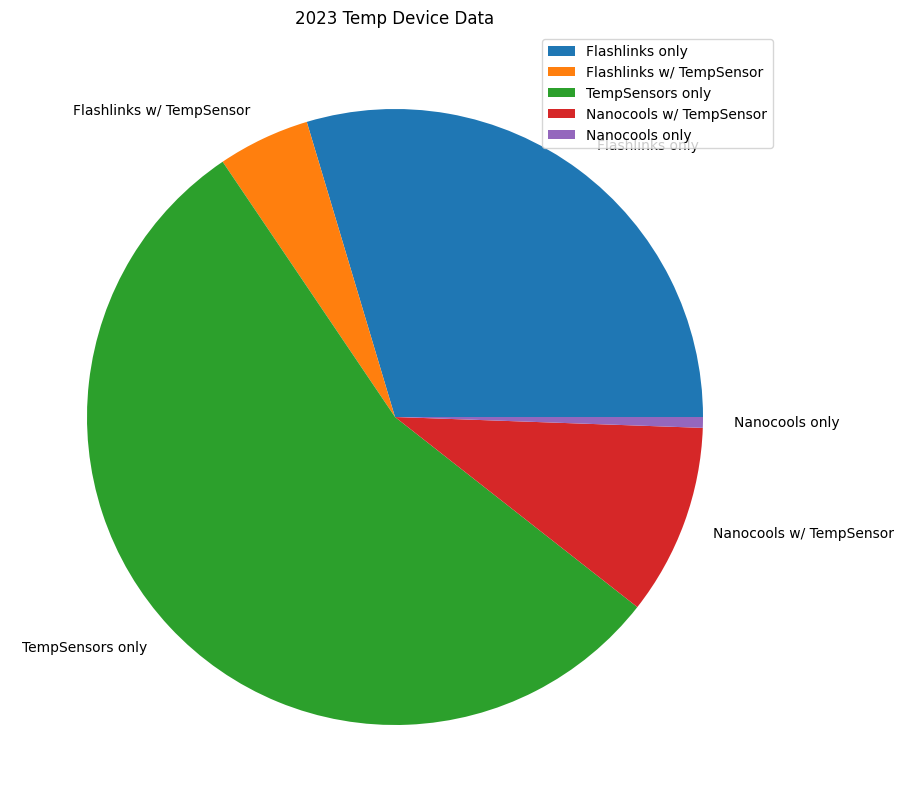

In [679]:
Flashlink_Tempsensor_Summary.plot(kind="pie",y="Number of Samples",figsize=(10,10))
plt.legend(loc='upper right')
plt.title("2023 Temp Device Data")
plt.ylabel("")
#plt.savefig("2023 Data Plots/06_Samples_Per_Day_Per_Quarter.png")

Text(0.5, 1.0, '2023')

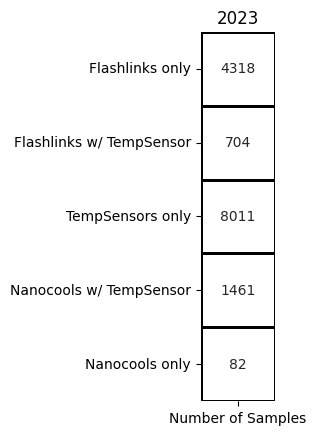

In [680]:
plt.figure(facecolor="w")
sns.heatmap(Flashlink_Tempsensor_Summary,
            annot=True,
            cmap=ListedColormap(['white']),
            linecolor="black",
            linewidth=1,
            fmt='g',
            square=True,
            cbar=False)
plt.title("2023")
#plt.savefig("2023 Data Plots/16_Flashlink_TempSensor_Table_2023.png")

In [681]:
Study_Flashlink_TempSensor

,Original Content (cntn_id),Subject ID,Created on,FlashLink Present,FlashLink Alarm Triggered,FlashLink Serial Number,Temp Sensor Present,Temp Sensor Trip Duration,Nanocool Kit Present,Nanocool Kit Activated
0,X000001X,101-0001,2023-01-01,True,False,123000001.0,True,0.0,True,True
1,X000001X,101-0004,2023-01-04,True,False,123000001.0,True,0.0,True,True
2,X000001X,101-0005,2023-01-05,True,False,123000001.0,True,0.0,True,True
3,X000002X,101-0008,2023-01-08,True,False,123000001.0,True,0.0,False,False
4,X000002X,101-0009,2023-01-09,True,False,123000001.0,True,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...
15412,X003569X,112-2659,2023-04-30,True,False,123000001.0,False,0.0,False,False
15413,X003570X,112-2660,2023-05-01,True,False,123000001.0,False,0.0,False,False
15414,X003571X,112-2661,2023-05-02,True,False,123000001.0,False,0.0,False,False
15415,X003572X,112-2662,2023-05-03,True,False,123000001.0,False,0.0,False,False


In [682]:
#Splitting the single column into multiple columns
Study_Flashlink_TempSensor[["Year","Month","Day"]]=Study_Flashlink_TempSensor["Created on"].str.split("-",expand = True)
#Study_Flashlink_TempSensor1 = Study_Flashlink_TempSensor.drop

#Study_Flashlink_TempSensor1 = Study_Flashlink_TempSensor['Month'].drop(Study_Flashlink_TempSensor[Study_Flashlink_TempSensor == 'nan'].index)

#Replace nan with 0
#Study_Flashlink_TempSensor.loc[Study_Flashlink_TempSensor.Month != 'nan', 'nan'] = 0

#del Study_Flashlink_TempSensor['nan']

Study_Flashlink_TempSensor

,Original Content (cntn_id),Subject ID,Created on,FlashLink Present,FlashLink Alarm Triggered,FlashLink Serial Number,Temp Sensor Present,Temp Sensor Trip Duration,Nanocool Kit Present,Nanocool Kit Activated,Year,Month,Day
0,X000001X,101-0001,2023-01-01,True,False,123000001.0,True,0.0,True,True,2023,01,01
1,X000001X,101-0004,2023-01-04,True,False,123000001.0,True,0.0,True,True,2023,01,04
2,X000001X,101-0005,2023-01-05,True,False,123000001.0,True,0.0,True,True,2023,01,05
3,X000002X,101-0008,2023-01-08,True,False,123000001.0,True,0.0,False,False,2023,01,08
4,X000002X,101-0009,2023-01-09,True,False,123000001.0,True,0.0,False,False,2023,01,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,X003569X,112-2659,2023-04-30,True,False,123000001.0,False,0.0,False,False,2023,04,30
15413,X003570X,112-2660,2023-05-01,True,False,123000001.0,False,0.0,False,False,2023,05,01
15414,X003571X,112-2661,2023-05-02,True,False,123000001.0,False,0.0,False,False,2023,05,02
15415,X003572X,112-2662,2023-05-03,True,False,123000001.0,False,0.0,False,False,2023,05,03


In [683]:
#Drop rows with nan
Study_Flashlink_TempSensor = Study_Flashlink_TempSensor.fillna(0)

#Change object to int
Study_Flashlink_TempSensor[["Day","Month"]]=Study_Flashlink_TempSensor[["Day","Month"]].astype(int)

#Cleanup Dataframe
del Study_Flashlink_TempSensor["Created on"]
del Study_Flashlink_TempSensor["Year"]

#Rename the numbers with the name of the day
Study_Flashlink_TempSensor["Day"] = Study_Flashlink_TempSensor["Day"].map({
    0: '1: Monday',
    1: '2: Tuesday',
    2: '3: Wednesday',
    3: '4: Thursday',
    4: '5: Friday',
    5: '6: Saturday',
    6: '7: Sunday'
})

Study_Flashlink_TempSensor["Month"] = pd.cut(Study_Flashlink_TempSensor["Month"], bins=quarter, labels= quarter_labels)

#Filter out the table by quarter
Study_Flashlink_TempSensor_Q1 = Study_Flashlink_TempSensor[(Study_Flashlink_TempSensor["Month"]=="Q1")]
Study_Flashlink_TempSensor_Q2 = Study_Flashlink_TempSensor[(Study_Flashlink_TempSensor["Month"]=="Q2")]
Study_Flashlink_TempSensor_Q3 = Study_Flashlink_TempSensor[(Study_Flashlink_TempSensor["Month"]=="Q3")]
Study_Flashlink_TempSensor_Q4 = Study_Flashlink_TempSensor[(Study_Flashlink_TempSensor["Month"]=="Q4")]

#Filter Flashlink Total
Study_Flashlink_Q1 = Study_Flashlink_TempSensor_Q1[(Study_Flashlink_TempSensor_Q1["FlashLink Present"]==True)]
Study_Flashlink_Q2 = Study_Flashlink_TempSensor_Q2[(Study_Flashlink_TempSensor_Q2["FlashLink Present"]==True)]
Study_Flashlink_Q3 = Study_Flashlink_TempSensor_Q3[(Study_Flashlink_TempSensor_Q3["FlashLink Present"]==True)]
Study_Flashlink_Q4 = Study_Flashlink_TempSensor_Q4[(Study_Flashlink_TempSensor_Q4["FlashLink Present"]==True)]

#Filter samples with Flashlink & Tempsensor
Study_Flashlink_w_TempSensor_Q1 = Study_Flashlink_Q1[(Study_Flashlink_Q1["Temp Sensor Present"]==True)]
Study_Flashlink_w_TempSensor_Q2 = Study_Flashlink_Q2[(Study_Flashlink_Q2["Temp Sensor Present"]==True)]
Study_Flashlink_w_TempSensor_Q3 = Study_Flashlink_Q3[(Study_Flashlink_Q3["Temp Sensor Present"]==True)]
Study_Flashlink_w_TempSensor_Q4 = Study_Flashlink_Q4[(Study_Flashlink_Q4["Temp Sensor Present"]==True)]

#Filter Tempsensor Total
Study_TempSensor_Q1 = Study_Flashlink_TempSensor_Q1[(Study_Flashlink_TempSensor_Q1["Temp Sensor Present"]==True)]
Study_TempSensor_Q2 = Study_Flashlink_TempSensor_Q2[(Study_Flashlink_TempSensor_Q2["Temp Sensor Present"]==True)]
Study_TempSensor_Q3 = Study_Flashlink_TempSensor_Q3[(Study_Flashlink_TempSensor_Q3["Temp Sensor Present"]==True)]
Study_TempSensor_Q4 = Study_Flashlink_TempSensor_Q4[(Study_Flashlink_TempSensor_Q4["Temp Sensor Present"]==True)]

#Filter Nanocools Total
Study_Nanocool_Q1 = Study_Flashlink_TempSensor_Q1[(Study_Flashlink_TempSensor_Q1["Nanocool Kit Present"]==True)]
Study_Nanocool_Q2 = Study_Flashlink_TempSensor_Q2[(Study_Flashlink_TempSensor_Q2["Nanocool Kit Present"]==True)]
Study_Nanocool_Q3 = Study_Flashlink_TempSensor_Q3[(Study_Flashlink_TempSensor_Q3["Nanocool Kit Present"]==True)]
Study_Nanocool_Q4 = Study_Flashlink_TempSensor_Q4[(Study_Flashlink_TempSensor_Q4["Nanocool Kit Present"]==True)]

#Filter Nanocools w/ Temp Sensor
Study_Nanocool_w_Tempsensor_Q1 = Study_Nanocool_Q1[(Study_Nanocool_Q1["Temp Sensor Present"]==True)]
Study_Nanocool_w_Tempsensor_Q2 = Study_Nanocool_Q2[(Study_Nanocool_Q2["Temp Sensor Present"]==True)]
Study_Nanocool_w_Tempsensor_Q3 = Study_Nanocool_Q3[(Study_Nanocool_Q3["Temp Sensor Present"]==True)]
Study_Nanocool_w_Tempsensor_Q4 = Study_Nanocool_Q4[(Study_Nanocool_Q4["Temp Sensor Present"]==True)]


#Calculating Total Number of Flashlink
Flashlink_total_Q1 = Study_Flashlink_Q1["FlashLink Present"].count()
Flashlink_total_Q2 = Study_Flashlink_Q2["FlashLink Present"].count()
Flashlink_total_Q3 = Study_Flashlink_Q3["FlashLink Present"].count()
Flashlink_total_Q4 = Study_Flashlink_Q4["FlashLink Present"].count()

#Calculating Number of Flashlink & Tempsensor
Flashlink_w_TempSensor_total_Q1 = Study_Flashlink_w_TempSensor_Q1["Temp Sensor Present"].count()
Flashlink_w_TempSensor_total_Q2 = Study_Flashlink_w_TempSensor_Q2["Temp Sensor Present"].count()
Flashlink_w_TempSensor_total_Q3 = Study_Flashlink_w_TempSensor_Q3["Temp Sensor Present"].count()
Flashlink_w_TempSensor_total_Q4 = Study_Flashlink_w_TempSensor_Q4["Temp Sensor Present"].count()

#Calculating Total Number of TempSensor
TempSensor_total_Q1 = Study_TempSensor_Q1["Temp Sensor Present"].count()
TempSensor_total_Q2 = Study_TempSensor_Q2["Temp Sensor Present"].count()
TempSensor_total_Q3 = Study_TempSensor_Q3["Temp Sensor Present"].count()
TempSensor_total_Q4 = Study_TempSensor_Q4["Temp Sensor Present"].count()

#Calculating Total Number of Nanocools
Nanocool_total_Q1 = Study_Nanocool_Q1["Nanocool Kit Present"].count()
Nanocool_total_Q2 = Study_Nanocool_Q2["Nanocool Kit Present"].count()
Nanocool_total_Q3 = Study_Nanocool_Q3["Nanocool Kit Present"].count()
Nanocool_total_Q4 = Study_Nanocool_Q4["Nanocool Kit Present"].count()

#Calculating Total Number of Nanocools
Nanocool_w_Tempsensor_total_Q1 = Study_Nanocool_w_Tempsensor_Q1["Nanocool Kit Present"].count()
Nanocool_w_Tempsensor_total_Q2 = Study_Nanocool_w_Tempsensor_Q2["Nanocool Kit Present"].count()
Nanocool_w_Tempsensor_total_Q3 = Study_Nanocool_w_Tempsensor_Q3["Nanocool Kit Present"].count()
Nanocool_w_Tempsensor_total_Q4 = Study_Nanocool_w_Tempsensor_Q4["Nanocool Kit Present"].count()

#Calculating the number of samples per quarter
Total_Samples_Q1 = Study_Flashlink_TempSensor_Q1["Month"].count()
Total_Samples_Q2 = Study_Flashlink_TempSensor_Q2["Month"].count()
Total_Samples_Q3 = Study_Flashlink_TempSensor_Q3["Month"].count()
Total_Samples_Q4 = Study_Flashlink_TempSensor_Q4["Month"].count()

#Creating Databases from these Calculations
Flashlink_Tempsensor_Summary_Q1=pd.DataFrame({
    "Flashlinks":[Flashlink_total_Q1-Flashlink_w_TempSensor_total_Q1],
    "Flashlinks & TempSensor": [Flashlink_w_TempSensor_total_Q1],
    "TempSensors": [abs(TempSensor_total_Q1-Flashlink_w_TempSensor_total_Q1-Nanocool_total_Q1)],
    "Nanocools & TempSensor": [Nanocool_w_Tempsensor_total_Q1],
    "Nanocools": [Nanocool_total_Q1-Nanocool_w_Tempsensor_total_Q1]
})
Flashlink_Tempsensor_Summary_Q1 = Flashlink_Tempsensor_Summary_Q1.transpose().rename(columns={0:"Number of Samples"})

Flashlink_Tempsensor_Summary_Q2=pd.DataFrame({
    "Flashlinks":[Flashlink_total_Q2-Flashlink_w_TempSensor_total_Q2],
    "Flashlinks & TempSensor": [Flashlink_w_TempSensor_total_Q2],
    "TempSensors": [abs(TempSensor_total_Q2-Flashlink_w_TempSensor_total_Q2-Nanocool_total_Q2)],
    "Nanocools & TempSensor": [Nanocool_w_Tempsensor_total_Q2],
    "Nanocools": [Nanocool_total_Q2-Nanocool_w_Tempsensor_total_Q2],  
})
Flashlink_Tempsensor_Summary_Q2 = Flashlink_Tempsensor_Summary_Q2.transpose().rename(columns={0:"Number of Samples"})

Flashlink_Tempsensor_Summary_Q3=pd.DataFrame({
    "Flashlinks":[Flashlink_total_Q3-Flashlink_w_TempSensor_total_Q3],
    "Flashlinks & TempSensor": [Flashlink_w_TempSensor_total_Q3],
    "TempSensors": [abs(TempSensor_total_Q3-Flashlink_w_TempSensor_total_Q3-Nanocool_total_Q3)],
    "Nanocools & TempSensor": [Nanocool_w_Tempsensor_total_Q3],
    "Nanocools": [Nanocool_total_Q3-Nanocool_w_Tempsensor_total_Q3],   
})
Flashlink_Tempsensor_Summary_Q3 = Flashlink_Tempsensor_Summary_Q3.transpose().rename(columns={0:"Number of Samples"})

Flashlink_Tempsensor_Summary_Q4=pd.DataFrame({
    "Flashlinks":[Flashlink_total_Q4-Flashlink_w_TempSensor_total_Q4],
    "Flashlinks & TempSensor": [Flashlink_w_TempSensor_total_Q4],
    "TempSensors": [abs(TempSensor_total_Q4-Flashlink_w_TempSensor_total_Q4-Nanocool_total_Q4)],
    "Nanocools & TempSensor": [Nanocool_w_Tempsensor_total_Q4],
    "Nanocools": [Nanocool_total_Q4-Nanocool_w_Tempsensor_total_Q4],
})

Flashlink_Tempsensor_Summary_Q4 = Flashlink_Tempsensor_Summary_Q4.transpose().rename(columns={0:"Number of Samples"})
Flashlink_Tempsensor_Summary_Q3

,Number of Samples
Flashlinks,1097
Flashlinks & TempSensor,188
TempSensors,1840
Nanocools & TempSensor,368
Nanocools,15


Text(0, 0.5, '')

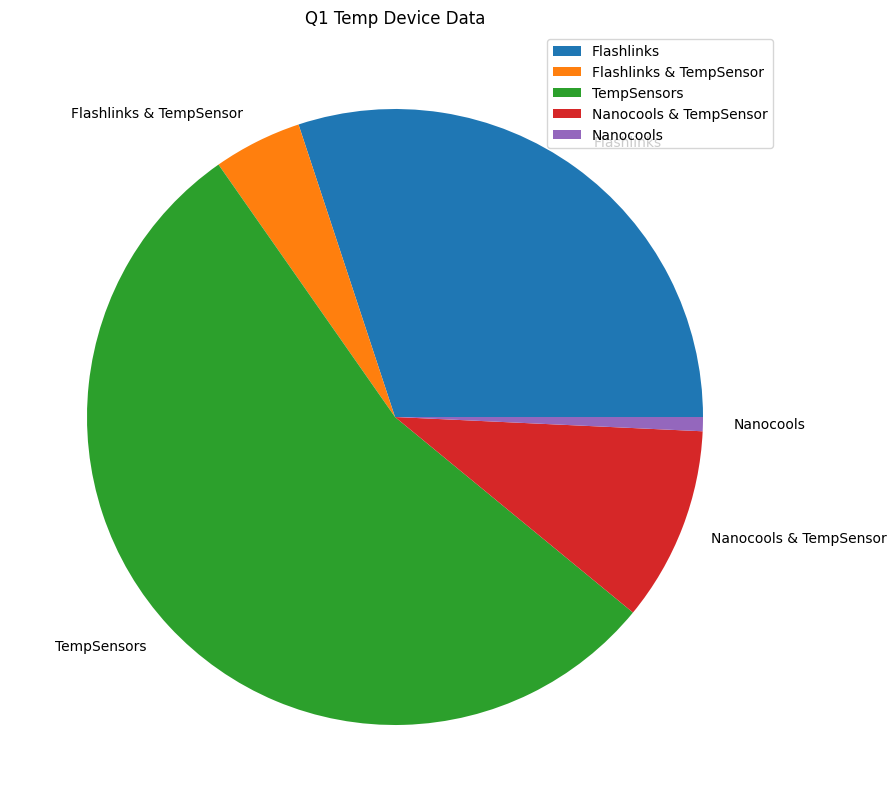

In [684]:
Flashlink_Tempsensor_Summary_Q1.plot(kind="pie",y="Number of Samples",figsize=(10,10))
plt.legend(loc='upper right')
plt.title("Q1 Temp Device Data")
plt.ylabel("")
#plt.savefig("2023 Data Plots/08_Flashlink_TempSensor_Data_Q1.png")

Text(0, 0.5, '')

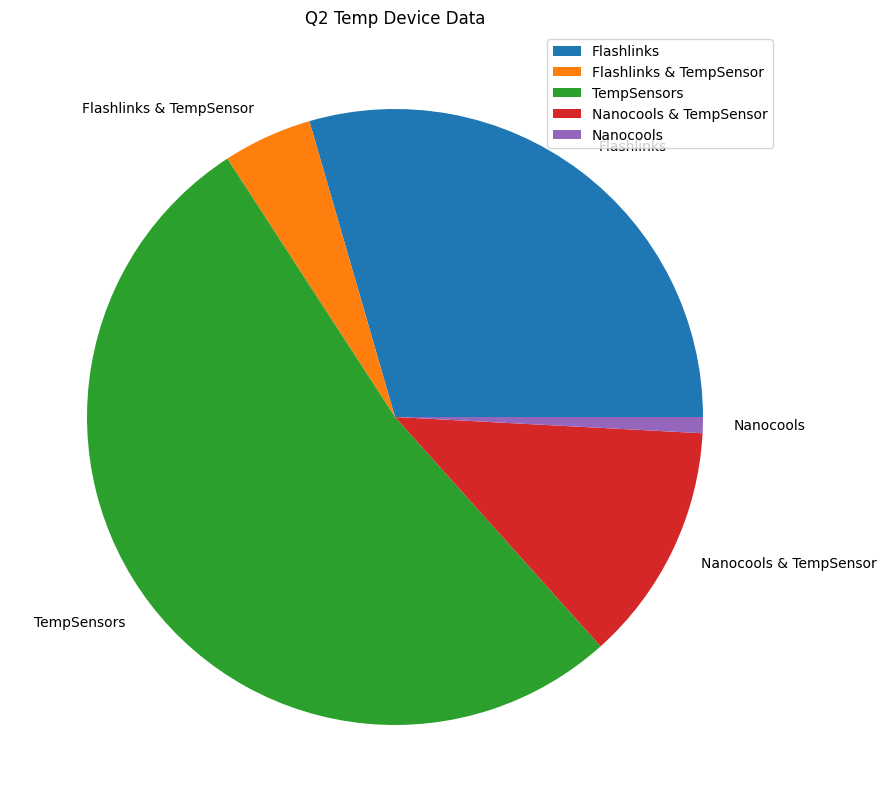

In [685]:
Flashlink_Tempsensor_Summary_Q2.plot(kind="pie",y="Number of Samples",figsize=(10,10))
plt.legend(loc='upper right')
plt.title("Q2 Temp Device Data")
plt.ylabel("")
#plt.savefig("2023 Data Plots/09_Flashlink_TempSensor_Data_Q2.png")

Text(0, 0.5, '')

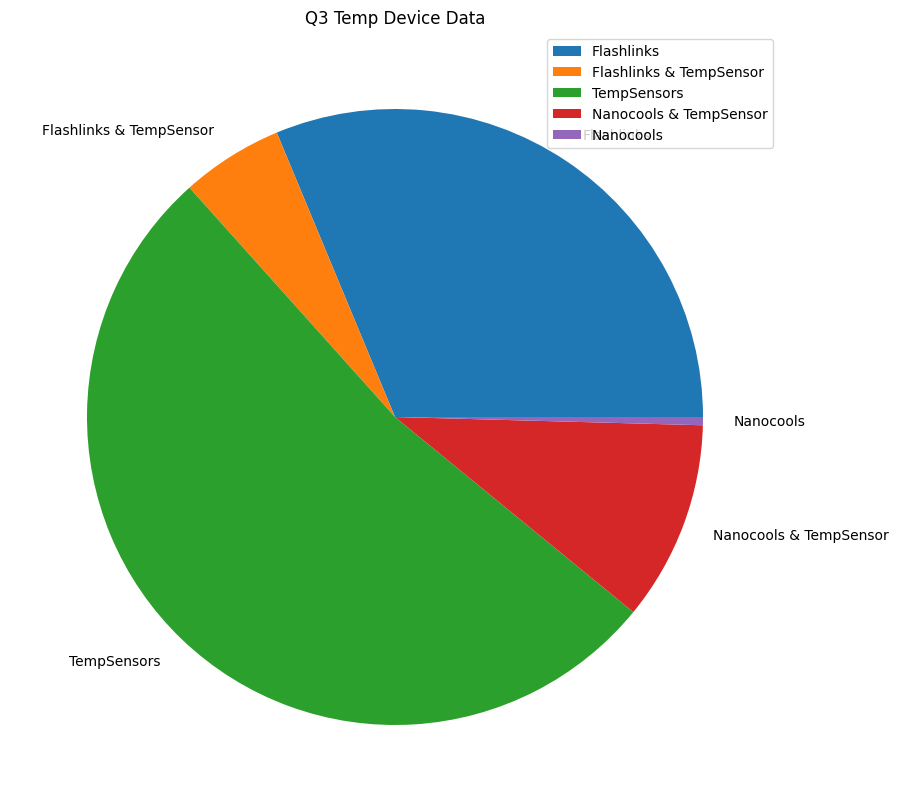

In [686]:
Flashlink_Tempsensor_Summary_Q3.plot(kind="pie",y="Number of Samples",figsize=(10,10))
plt.legend(loc='upper right')
plt.title("Q3 Temp Device Data")
plt.ylabel("")
#plt.savefig("2023 Data Plots/10_Flashlink_TempSensor_Data_Q3.png")

Text(0, 0.5, '')

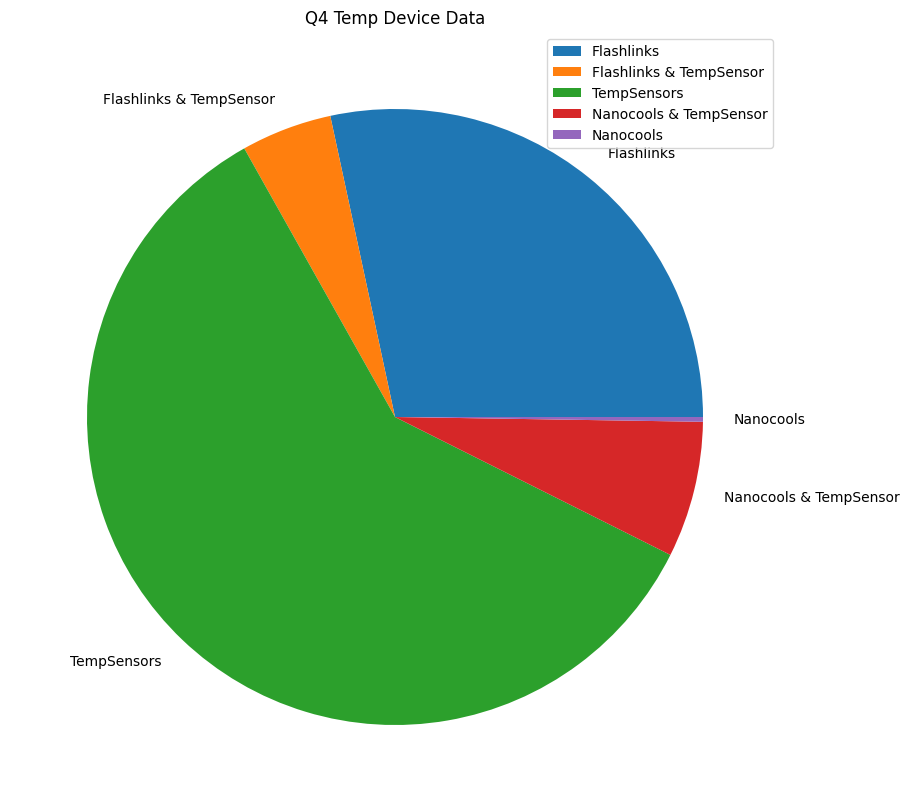

In [687]:
Flashlink_Tempsensor_Summary_Q4.plot(kind="pie",y="Number of Samples",figsize=(10,10))
plt.legend(loc='upper right')
plt.title("Q4 Temp Device Data")
plt.ylabel("")
#plt.savefig("2023 Data Plots/11_Flashlink_TempSensor_Data_Q4.png")

In [688]:
#Proivide List of Sites that are not using the Flashlinks
#Flashlinks were not used in Q1
Study_No_Flashlink_Q1 = Study_Flashlink_TempSensor_Q1[(Study_Flashlink_TempSensor_Q1["FlashLink Present"]==False)]
Study_No_Flashlink_Q2 = Study_Flashlink_TempSensor_Q2[(Study_Flashlink_TempSensor_Q2["FlashLink Present"]==False)]
Study_No_Flashlink_Q3 = Study_Flashlink_TempSensor_Q3[(Study_Flashlink_TempSensor_Q3["FlashLink Present"]==False)]
Study_No_Flashlink_Q4 = Study_Flashlink_TempSensor_Q4[(Study_Flashlink_TempSensor_Q4["FlashLink Present"]==False)]

Study_No_Flashlink_Q1 = pd.DataFrame(Study_No_Flashlink_Q1,columns=[
    "Original Content (cntn_id)",
    "Subject ID"])

Study_No_Flashlink_Q2 = pd.DataFrame(Study_No_Flashlink_Q2,columns=[
    "Original Content (cntn_id)",
    "Subject ID"])

Study_No_Flashlink_Q3 = pd.DataFrame(Study_No_Flashlink_Q3,columns=[
    "Original Content (cntn_id)",
    "Subject ID"])

Study_No_Flashlink_Q4 = pd.DataFrame(Study_No_Flashlink_Q4,columns=[
    "Original Content (cntn_id)",
    "Subject ID"])

print("These are the Accession IDs and Subject IDs of samples missing Flashlinks")
Study_No_Flashlink_Q4

These are the Accession IDs and Subject IDs of samples missing Flashlinks


,Original Content (cntn_id),Subject ID
720,X000649X,101-0725
721,X000650X,101-0726
722,X000651X,101-0727
723,X000652X,101-0728
724,X000653X,101-0729
...,...,...
15285,X003442X,112-2532
15286,X003443X,112-2533
15287,X003444X,112-2534
15288,X003445X,112-2535


Text(0.5, 1.0, 'Q1')

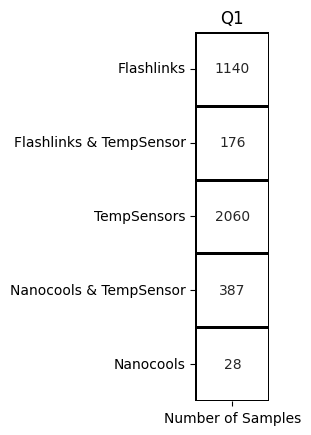

In [689]:
plt.figure(facecolor="w")
sns.heatmap(Flashlink_Tempsensor_Summary_Q1,
            annot=True,
            cmap=ListedColormap(['white']),
            linecolor="black",
            linewidth=1,
            fmt='g',
            square=True,
            cbar=False)
plt.title("Q1")
#plt.savefig("2023 Data Plots/12_Flashlink_TempSensor_Table_Q1.png")

Text(0.5, 1.0, 'Q2')

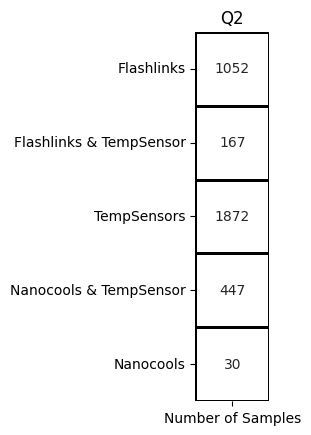

In [690]:
plt.figure(facecolor="w")
sns.heatmap(Flashlink_Tempsensor_Summary_Q2,
            annot=True,
            cmap=ListedColormap(['white']),
            linecolor="black",
            linewidth=1,
            fmt='g',
            square=True,
            cbar=False)
plt.title("Q2")
#plt.savefig("2023 Data Plots/13_Flashlink_TempSensor_Table_Q2.png")

Text(0.5, 1.0, 'Q3')

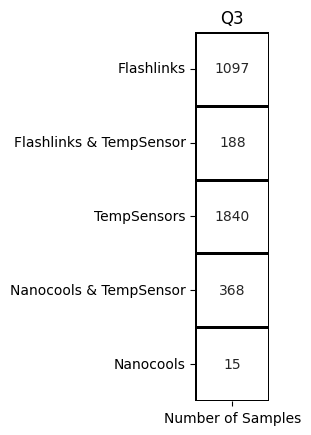

In [691]:
plt.figure(facecolor="w")
sns.heatmap(Flashlink_Tempsensor_Summary_Q3,
            annot=True,
            cmap=ListedColormap(['white']),
            linecolor="black",
            linewidth=1,
            fmt='g',
            square=True,
            cbar=False)
plt.title("Q3")
#plt.savefig("2023 Data Plots/14_Flashlink_TempSensor_Table_Q3.png")

Text(0.5, 1.0, 'Q4')

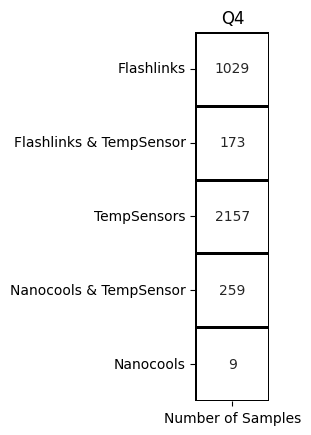

In [692]:
plt.figure(facecolor="w")
sns.heatmap(Flashlink_Tempsensor_Summary_Q4,
            annot=True,
            cmap=ListedColormap(['white']),
            linecolor="black",
            linewidth=1,
            fmt='g',
            square=True,
            cbar=False)
plt.title("Q4")
#plt.savefig("2023 Data Plots/15_Flashlink_TempSensor_Table_Q4.png")

<h1>Sample Deviation Breakdown and Analysis</h1>

In [782]:
#Update File Path for Salesforce Ticket Data
sample_deviation_file = "Resources/2023_Sample_Deviation_Report_Randomized.csv"

In [783]:
#Reference the Salesforce file that we are analyzing
Study_Path_Deviation = Path(sample_deviation_file)
Study_RawData_Deviation = pd.read_csv(Study_Path_Deviation,low_memory=False)

#Show first 5 rows of the Database
Study_RawData_Deviation

,Subject ID,Study Name,Case Number,Case Owner,Opened Date,Case Last Modified Date,Type of Issue
0,101-0009,Executive Study,10001,Project Stakeholders,1/2/23,1/3/23,Low volume
1,101-0010,Executive Study,10002,Project Stakeholders,1/3/23,1/4/23,Low volume
2,101-0011,Executive Study,10003,Project Stakeholders,1/4/23,1/5/23,Low volume
3,101-0278,Executive Study,10004,Project Stakeholders,6/2/23,6/3/23,Low volume
4,101-0279,Executive Study,10005,Project Stakeholders,6/3/23,6/4/23,Low volume
...,...,...,...,...,...,...,...
136,104-0389,Executive Study,10137,Project Stakeholders,12/29/23,1/1/24,Missing Info
137,104-0393,Executive Study,10138,Project Stakeholders,12/30/23,1/2/24,Missing Info
138,104-0517,Executive Study,10139,Project Stakeholders,12/31/23,1/3/24,Missing Info
139,104-0523,Executive Study,10140,Project Stakeholders,5/25/23,5/28/23,Missing Info


In [784]:
#Confirm that all tickets are for the current study
current_study = Study_RawData_Deviation['Study Name'].unique()
print(f"The samples in dataset are from {current_study} study")

#Check dtypes of each column
Study_RawData_Deviation.dtypes

The samples in dataset are from ['Executive Study'] study


Subject ID                 object
Study Name                 object
Case Number                 int64
Case Owner                 object
Opened Date                object
Case Last Modified Date    object
Type of Issue              object
dtype: object

<h2>Salesforce Data Cleanup</h2>

In [785]:
#Find all Issue Types
print(Study_RawData_Deviation['Type of Issue'].unique())

['Low volume' 'Collection Date > 7 days' 'Mismatch Information'
 'Only one viable BCT' 'Operator Error' 'Blank Forms' 'Missing Info']


In [786]:
########################################################################################
#Code utilized if there are multiple criteria that needs to be consolidated
########################################################################################

#Change Subject ID Column to string in order to split
#Study_RawData_Deviation["Subject ID"] = Study_RawData_Deviation["Subject ID"].astype('str') # which will by default set the length to the max len it encounters

#Recategorize Type of Issues to these categories 
#Missing Information, Mismatch Information, EDC/SLIMS Discrepancy, Duplicate Subject ID, Clotted, Hemolyzed, One/No Viable BCT, GDP/Smeared BCTs & Operator Error
#Study_RawData_Deviation['Type of Issue']=Study_RawData_Deviation['Type of Issue'].replace(['Missing Info on RF',
                                                                                                #'All BCTs Blank',
                                                                                                #'Missing Subj ID on BCTs',
                                                                                                #'Missing DOC on BCTs',
                                                                                                #'Missing Info on RF; Other'
                                                                                                #],'Missing Information')

#Study_RawData_Deviation['Type of Issue']=Study_RawData_Deviation['Type of Issue'].replace(['Sub ID Mismatch b/w req and bcts',
                                                                                                #'Access ID Mismatch b/w req and bcts',
                                                                                                #'Sub ID Mismatch w/in BCTs',
                                                                                                #'DOC Mismatch b/w RF and BCTs'
                                                                                               # ],'Mismatch Information')

#Study_RawData_Deviation['Type of Issue']=Study_RawData_Deviation['Type of Issue'].replace(['DOC Mismatch b/w RF and BCTs; EDC/SLIMS Discrepancy'
                                                                                               # ],'EDC/SLIMS Discrepancy')

#Study_RawData_Deviation['Type of Issue']=Study_RawData_Deviation['Type of Issue'].replace(['Clotted',
                                                                                               #  'Clotted; Only one viable BCT'
                                                                                               # ],'Clotted')

#Study_RawData_Deviation['Type of Issue']=Study_RawData_Deviation['Type of Issue'].replace(['Collection Date > 7 days',
                                                                                               # 'Gross Hemolysis',
                                                                                                #'Gross Hemolysis; Only one viable BCT'
                                                                                                #],'Hemolyzed/>7 DOC')

#Study_RawData_Deviation['Type of Issue']=Study_RawData_Deviation['Type of Issue'].replace(['Low volume',
                                                                                                #'Only one viable BCT'
                                                                                                #],'One/No Viable BCT')

#Study_RawData_Deviation['Type of Issue']=Study_RawData_Deviation['Type of Issue'].replace(['Other',
                                                                                               # 'Bad GDP',
                                                                                               # 'Smeared BCTs',
                                                                                               # 'No Req Form'
                                                                                               # ],'Other')

#Confirming dtype change
#Study_RawData_Deviation.iloc[0]

In [787]:
#Rename Columns
Study_RawData_Deviation = Study_RawData_Deviation.rename(columns={"Case Last Modified Date":"Closed Date"})  

#Split Subject ID by "-" so that there is a separate column for Site ID & Patient ID
Study_RawData_Deviation[["Site ID","Patient ID"]] = Study_RawData_Deviation["Subject ID"].str.split("-",expand = True)

#Convert dataset to timeframe format
Study_RawData_Deviation["Opened Date"]= pd.to_datetime(Study_RawData_Deviation["Opened Date"], yearfirst=False, infer_datetime_format = True)
Study_RawData_Deviation["Opened Date"]= Study_RawData_Deviation["Opened Date"].dt.strftime('%d/%m/%Y')

Study_RawData_Deviation["Closed Date"]= pd.to_datetime(Study_RawData_Deviation["Closed Date"], yearfirst=False, infer_datetime_format = True)
Study_RawData_Deviation["Closed Date"]= Study_RawData_Deviation["Closed Date"].dt.strftime('%d/%m/%Y')

#Create a new DataFrame for the cleaned db
Study_Deviation_db = pd.DataFrame(Study_RawData_Deviation, columns=[
    "Site ID",
    "Type of Issue",
    "Opened Date",
    "Closed Date"
])

Study_Deviation_db

,Site ID,Type of Issue,Opened Date,Closed Date
0,101,Low volume,02/01/2023,03/01/2023
1,101,Low volume,03/01/2023,04/01/2023
2,101,Low volume,04/01/2023,05/01/2023
3,101,Low volume,02/06/2023,03/06/2023
4,101,Low volume,03/06/2023,04/06/2023
...,...,...,...,...
136,104,Missing Info,29/12/2023,01/01/2024
137,104,Missing Info,30/12/2023,02/01/2024
138,104,Missing Info,31/12/2023,03/01/2024
139,104,Missing Info,25/05/2023,28/05/2023


<h2>Sample Deviation Breakdown</h2>

In [788]:
#Group by Issue Type
issue_breakdown = Study_Deviation_db.groupby(['Type of Issue']).count()

#Delete unnecessary columns
del issue_breakdown['Opened Date']
del issue_breakdown['Closed Date']

issue_breakdown

,Site ID
Type of Issue,
Blank Forms,28
Collection Date > 7 days,7
Low volume,17
Mismatch Information,14
Missing Info,24
Only one viable BCT,38
Operator Error,13


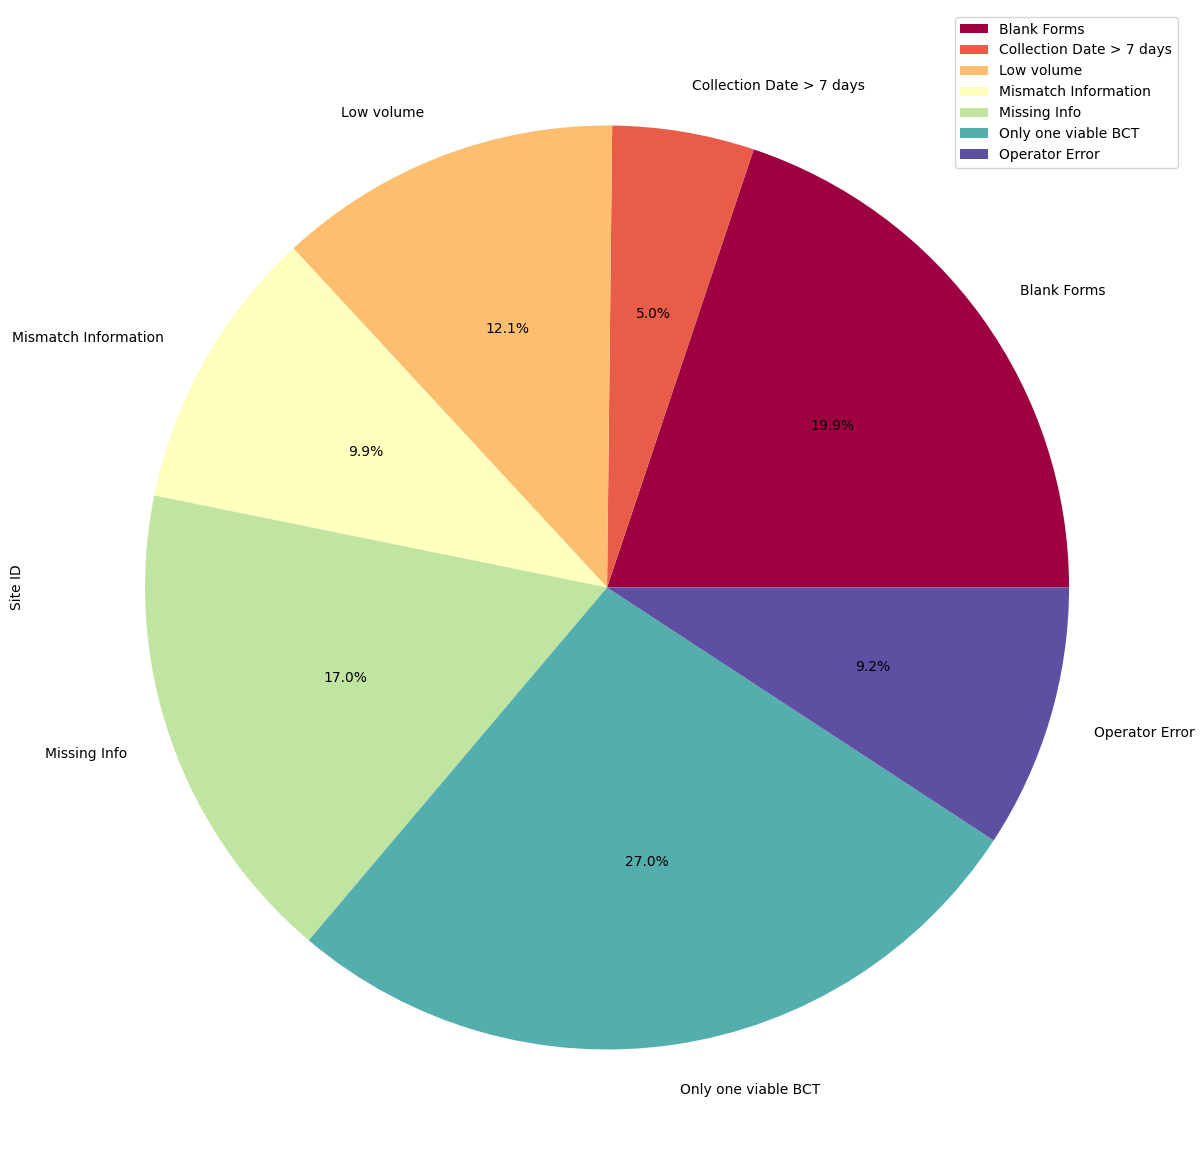

In [789]:
#Graphing Issue Type
issue_breakdown.plot.pie(y="Site ID",
                         figsize=(20,15),
                         colormap='Spectral', 
                         autopct='%1.1f%%')

plt.legend()

<h2>Group By Site to Identify Issues per Site</h2>

In [790]:
#Group by Site ID count frequency of Issue Type
site_issue_table = Study_Deviation_db.groupby(['Site ID','Type of Issue']).count()

#Delete unnecessary columns
del site_issue_table['Opened Date']

#Rename column to reflect Issue Type count
site_issue_table = site_issue_table.rename(columns={"Closed Date":"Issue Types"})  

#Transform grouped db into a pivot table for  graphing
site_issue_table = site_issue_table.pivot_table(index='Site ID', columns='Type of Issue')

#Fill the NaN values with zero
site_issue_table = site_issue_table.fillna(0)

#Change the dtype to integer to remove decimal place
site_issue_table = site_issue_table.astype(int)

#View the new pivot table
site_issue_table

Issue Types                                      \
Type of Issue Blank Forms Collection Date > 7 days Low volume   
Site ID                                                         
101                     8                        0          8   
102                     3                        0          6   
103                     5                        7          3   
104                     4                        0          0   
108                     0                        0          0   
109                     0                        0          0   
110                     4                        0          0   
111                     0                        0          0   
112                     4                        0          0   

                                                                     \
Type of Issue Mismatch Information Missing Info Only one viable BCT   
Site ID                                                               
101                              0            0                   0   
102                              0            5                   0   
103                             10            5                   0   
104                              4           14                  22   
108                              0            0                   6   
109                              0            0                   1   
110                              0            0                   0   
111                              0            0                   4   
112                              0            0                   5   

                              
Type of Issue Operator Error  
Site ID                       
101                        5  
102                        0  
103                        0  
104                        0  
108                        0  
109                        0  
110                        0  
111                        0  
112                        8

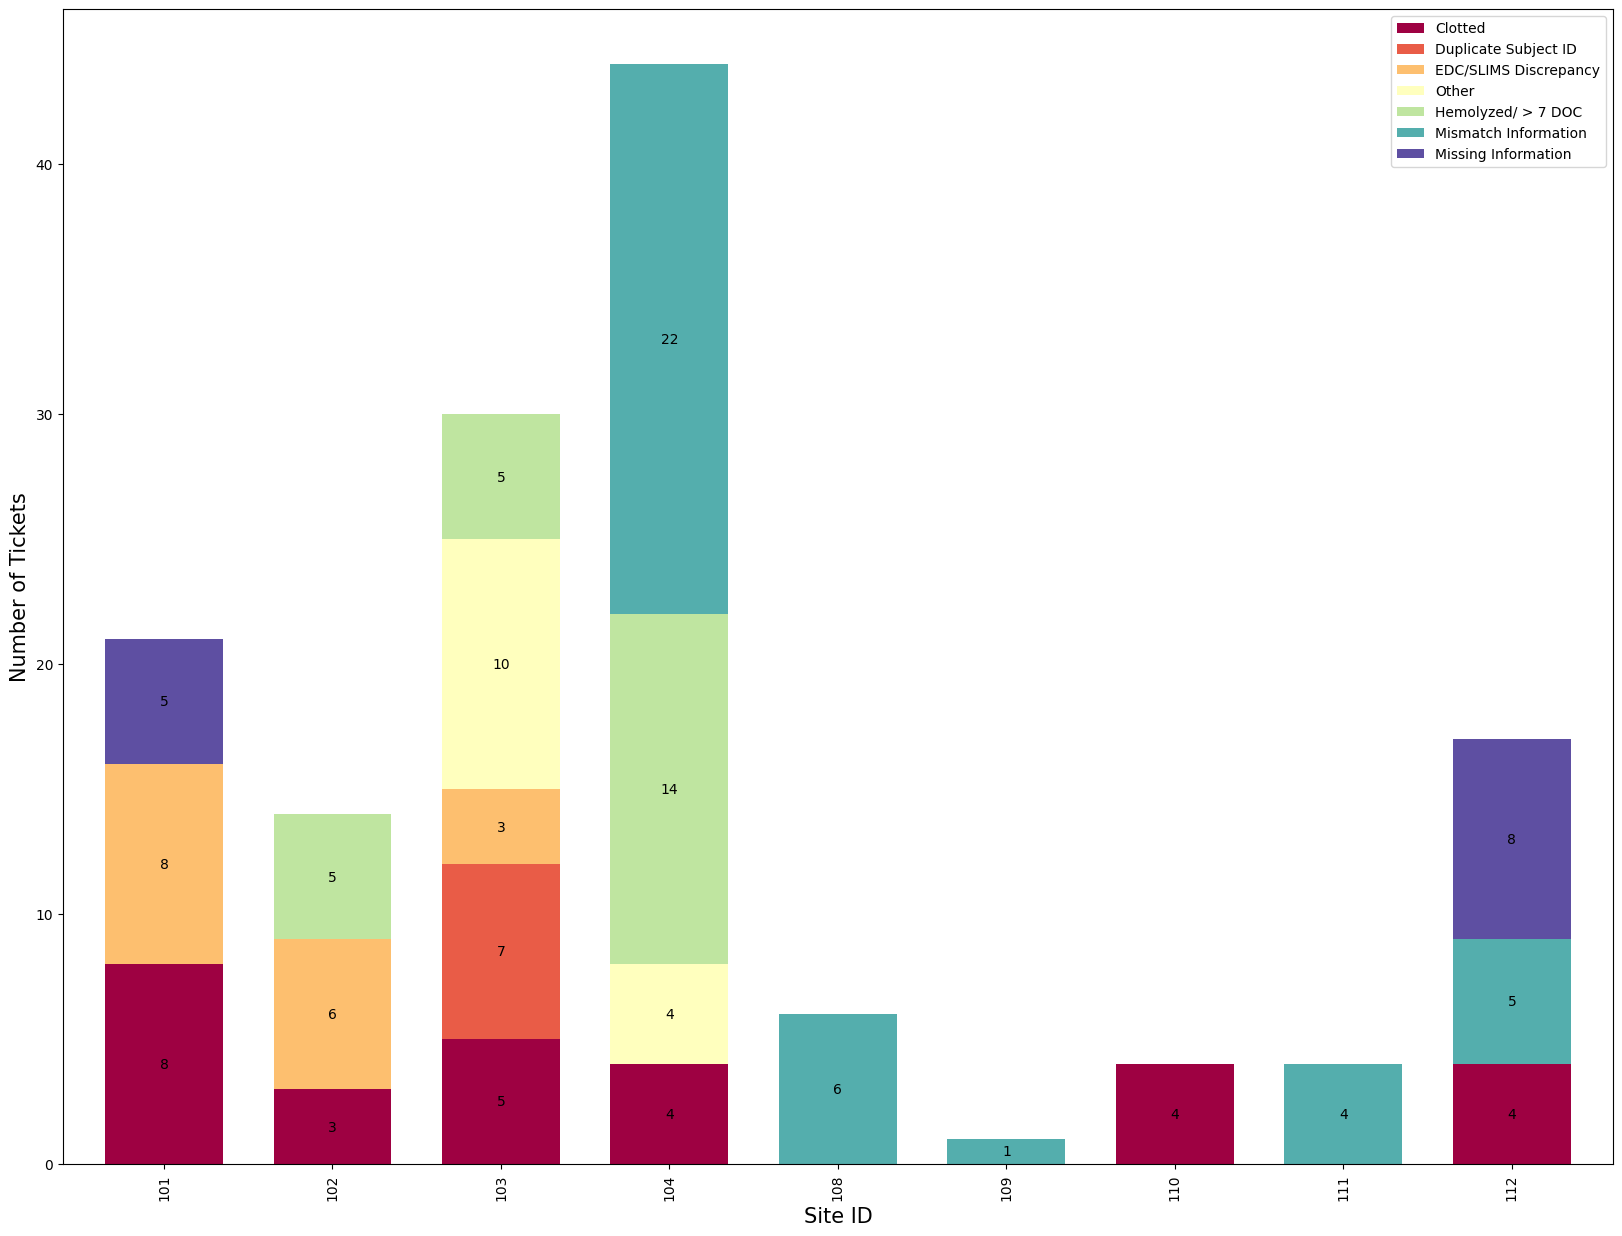

In [791]:
ax = site_issue_table.plot.bar(stacked = True, figsize=(20,15), width=.7, colormap='Spectral', fontsize=10)

#Labeling x y axis
ax.set_ylabel('Number of Tickets',fontsize=15)
ax.set_xlabel('Site ID',fontsize=15)

#Renaming the Legend
ax.legend(["Clotted",
           "Duplicate Subject ID",
            "EDC/SLIMS Discrepancy",
            "Other",
            "Hemolyzed/ > 7 DOC",
            "Mismatch Information",
            "Missing Information",
            "One/No Viable BCT",
            "Operator Error",
            "Site Initiated Correction"
           ])

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='center')

#ax.figure.savefig('2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png')

In [792]:
#Group by Site ID count frequency of Issue Type
site_issue_table_sum = Study_Deviation_db.groupby(['Site ID']).count()

#Delete unnecessary columns
del site_issue_table_sum['Opened Date']
del site_issue_table_sum['Closed Date']

#Rename column to reflect Issue Type count
site_issue_table_sum = site_issue_table_sum.rename(columns={"Type of Issue":"Number of Tickets"})  

#View the new pivot table
site_issue_table_sum

,Number of Tickets
Site ID,
101,21
102,14
103,30
104,44
108,6
109,1
110,4
111,4
112,17


Text(0.5, 0, 'Site ID')

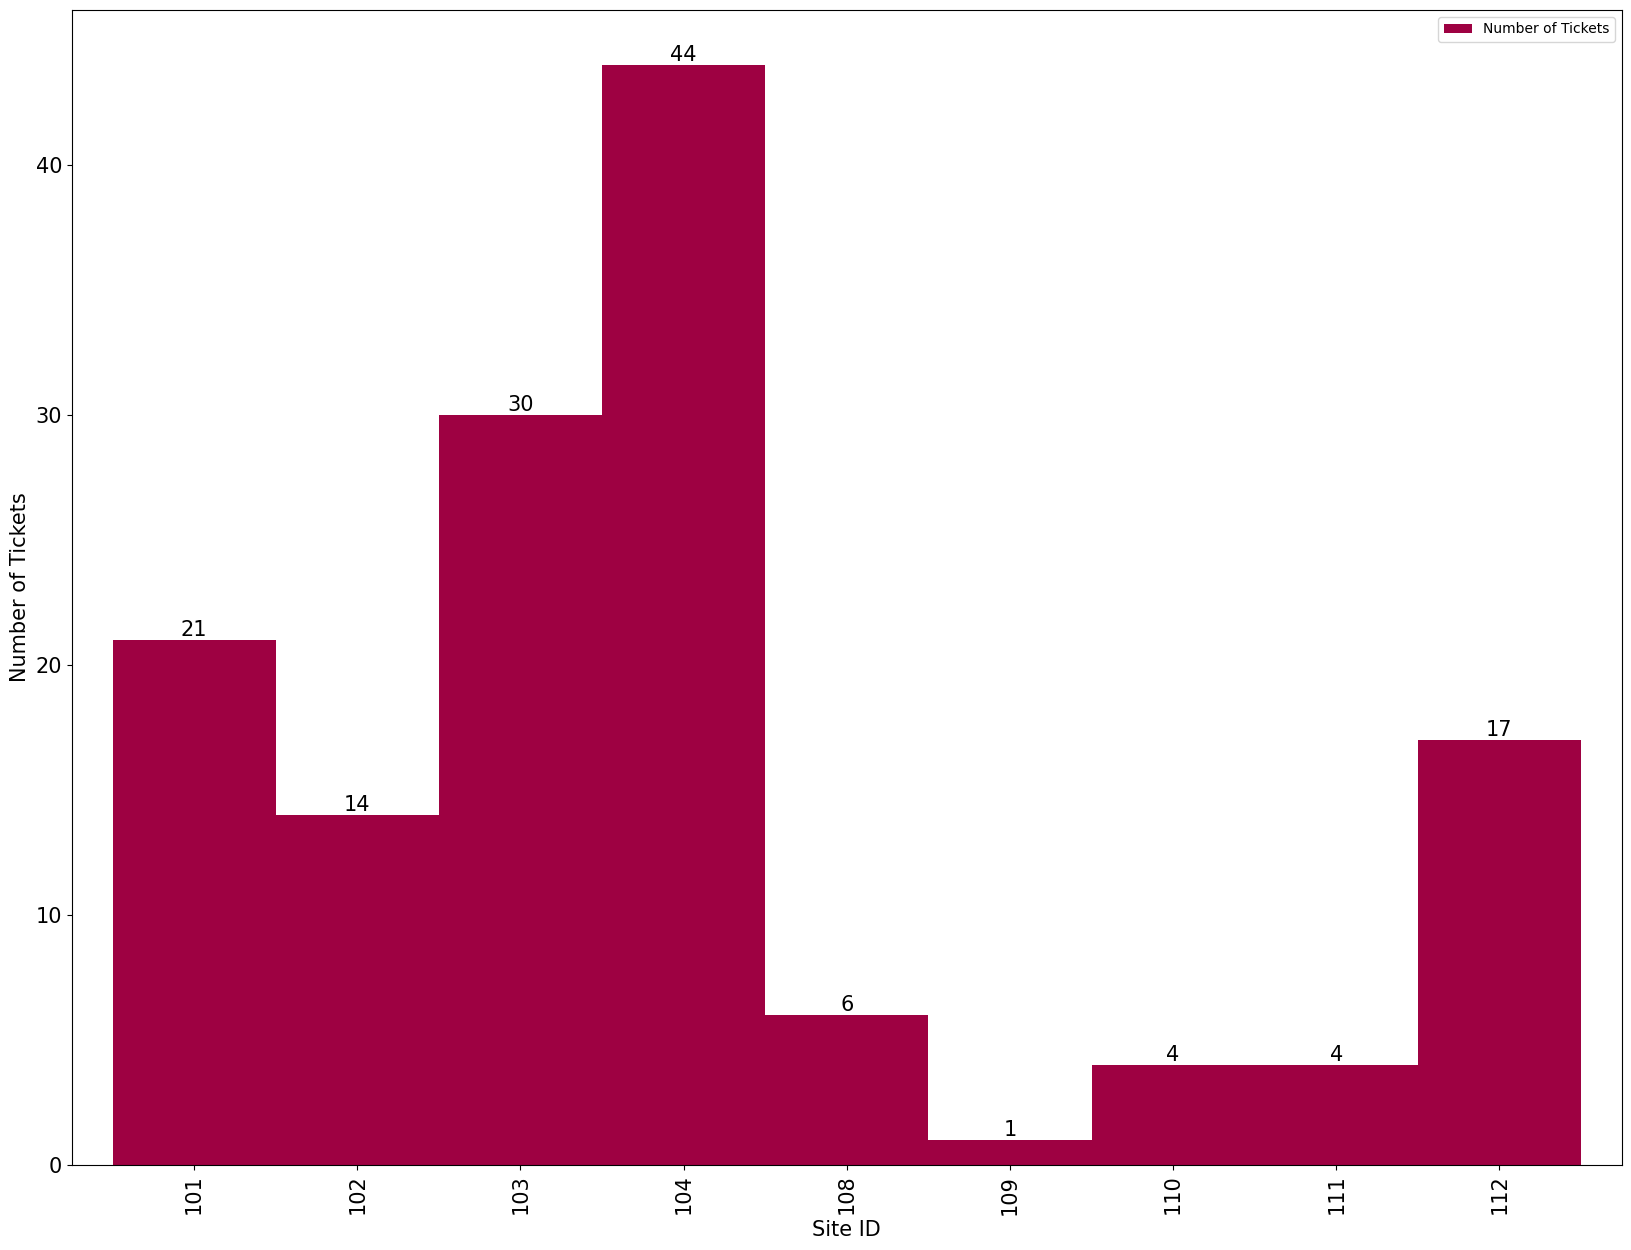

In [793]:
ax = site_issue_table_sum.plot.bar(stacked = False, figsize=(20,15), width=1.0, colormap='Spectral',fontsize=15)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='edge',fontsize=15)

#Labeling x y axis
ax.set_ylabel('Number of Tickets',fontsize=15)
ax.set_xlabel('Site ID',fontsize=15)

<h2>Total Number of Tickets Per Quarter</h2>

In [794]:
#Creating a copy of the database
Deviation_db = Study_Deviation_db.copy()

#Delete unneeded columns
del Deviation_db['Closed Date']

#Splitting the ticket open date as the "Created on Date" and splitsingle column into multiple columns
Deviation_db[["Day","Month","Year"]]=Deviation_db["Opened Date"].str.split("/",expand = True)

Deviation_db

,Site ID,Type of Issue,Opened Date,Day,Month,Year
0,101,Low volume,02/01/2023,02,01,2023
1,101,Low volume,03/01/2023,03,01,2023
2,101,Low volume,04/01/2023,04,01,2023
3,101,Low volume,02/06/2023,02,06,2023
4,101,Low volume,03/06/2023,03,06,2023
...,...,...,...,...,...,...
136,104,Missing Info,29/12/2023,29,12,2023
137,104,Missing Info,30/12/2023,30,12,2023
138,104,Missing Info,31/12/2023,31,12,2023
139,104,Missing Info,25/05/2023,25,05,2023


In [795]:
#Change the type back to datetime
Deviation_db["Opened Date"] = pd.to_datetime(Deviation_db["Opened Date"],errors='coerce')

#Override Open Date with data that shows day of week
Deviation_db["Opened Date"] = Deviation_db["Opened Date"].dt.dayofweek

#Rename the numbers with the name of the day
Deviation_db["Opened Date"] = Deviation_db["Opened Date"].map({
    0: '1: Monday',
    1: '2: Tuesday',
    2: '3: Wednesday',
    3: '4: Thursday',
    4: '5: Friday',
    5: '6: Saturday',
    6: '7: Sunday'
})

#Creating a value that tells us how many rows there are. Starting number is 0
index_tickets_num = len(Deviation_db) - 1

#Creates a Dataframe based on the number of months in dataset
Quarterly_Deviation_db = Deviation_db.iloc[:,0: index_tickets_num]

Quarterly_Deviation_db

#Quarter labels were created in previous cell.
#quarter=[0,3,6,9,12]
#quarter_labels = ["Q1","Q2","Q3","Q4"]

#Change dtype of "Month","Date" and "Year" to int
Quarterly_Deviation_db["Month"] = Quarterly_Deviation_db["Month"].astype(int)
Quarterly_Deviation_db["Day"] = Quarterly_Deviation_db["Day"].astype(int)
Quarterly_Deviation_db["Year"] = Quarterly_Deviation_db["Year"].astype(int)

#Bin by Quarter by Month & Cleanup dataframe
Quarterly_Deviation_db["Month"] = pd.cut(Quarterly_Deviation_db["Month"], bins=quarter, labels= quarter_labels)

#Rename column
Quarterly_Deviation_db = Quarterly_Deviation_db.rename(columns={'Month':'Quarter'})

#Delete Unnecessary columns
del Quarterly_Deviation_db['Year']
del Quarterly_Deviation_db['Day']

Quarterly_Deviation_db

/tmp/ipykernel_14081/4108621817.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Deviation_db["Opened Date"] = pd.to_datetime(Deviation_db["Opened Date"],errors='coerce')


,Site ID,Type of Issue,Opened Date,Quarter
0,101,Low volume,3: Wednesday,Q1
1,101,Low volume,3: Wednesday,Q1
2,101,Low volume,6: Saturday,Q1
3,101,Low volume,1: Monday,Q2
4,101,Low volume,1: Monday,Q2
...,...,...,...,...
136,104,Missing Info,5: Friday,Q4
137,104,Missing Info,6: Saturday,Q4
138,104,Missing Info,7: Sunday,Q4
139,104,Missing Info,4: Thursday,Q2


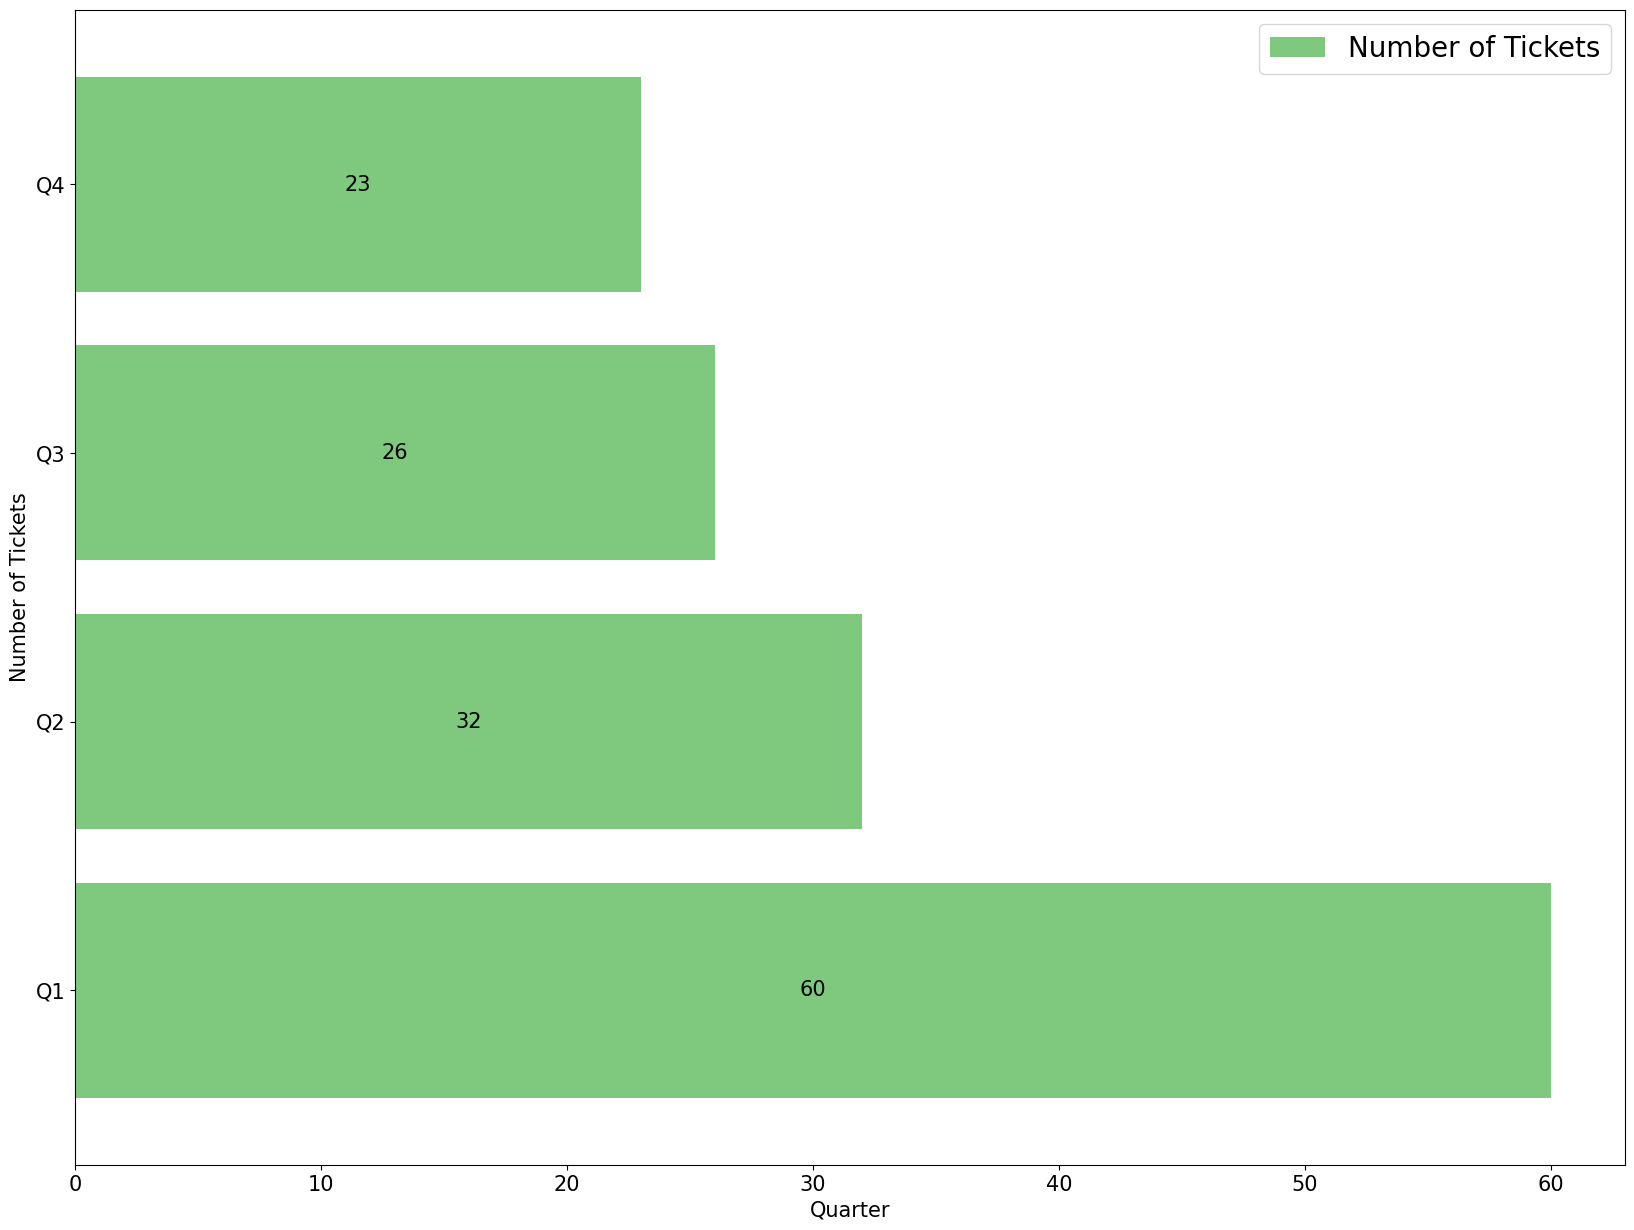

In [796]:
quarterly_sum = Quarterly_Deviation_db.groupby(['Quarter']).count()
del quarterly_sum['Opened Date']
del quarterly_sum['Type of Issue']

ax = quarterly_sum.plot.barh(figsize=(20,15),
                                width=0.8, 
                                colormap='Accent',
                                fontsize=15,
                                align='center',
                               )

#Labeling x y axis
ax.set_ylabel('Number of Tickets',fontsize=15)
ax.set_xlabel('Quarter',fontsize=15)

#Renaming the Legend
ax.legend(['Number of Tickets'],fontsize=20)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='center',fontsize=15)

#ax.figure.savefig('2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png')

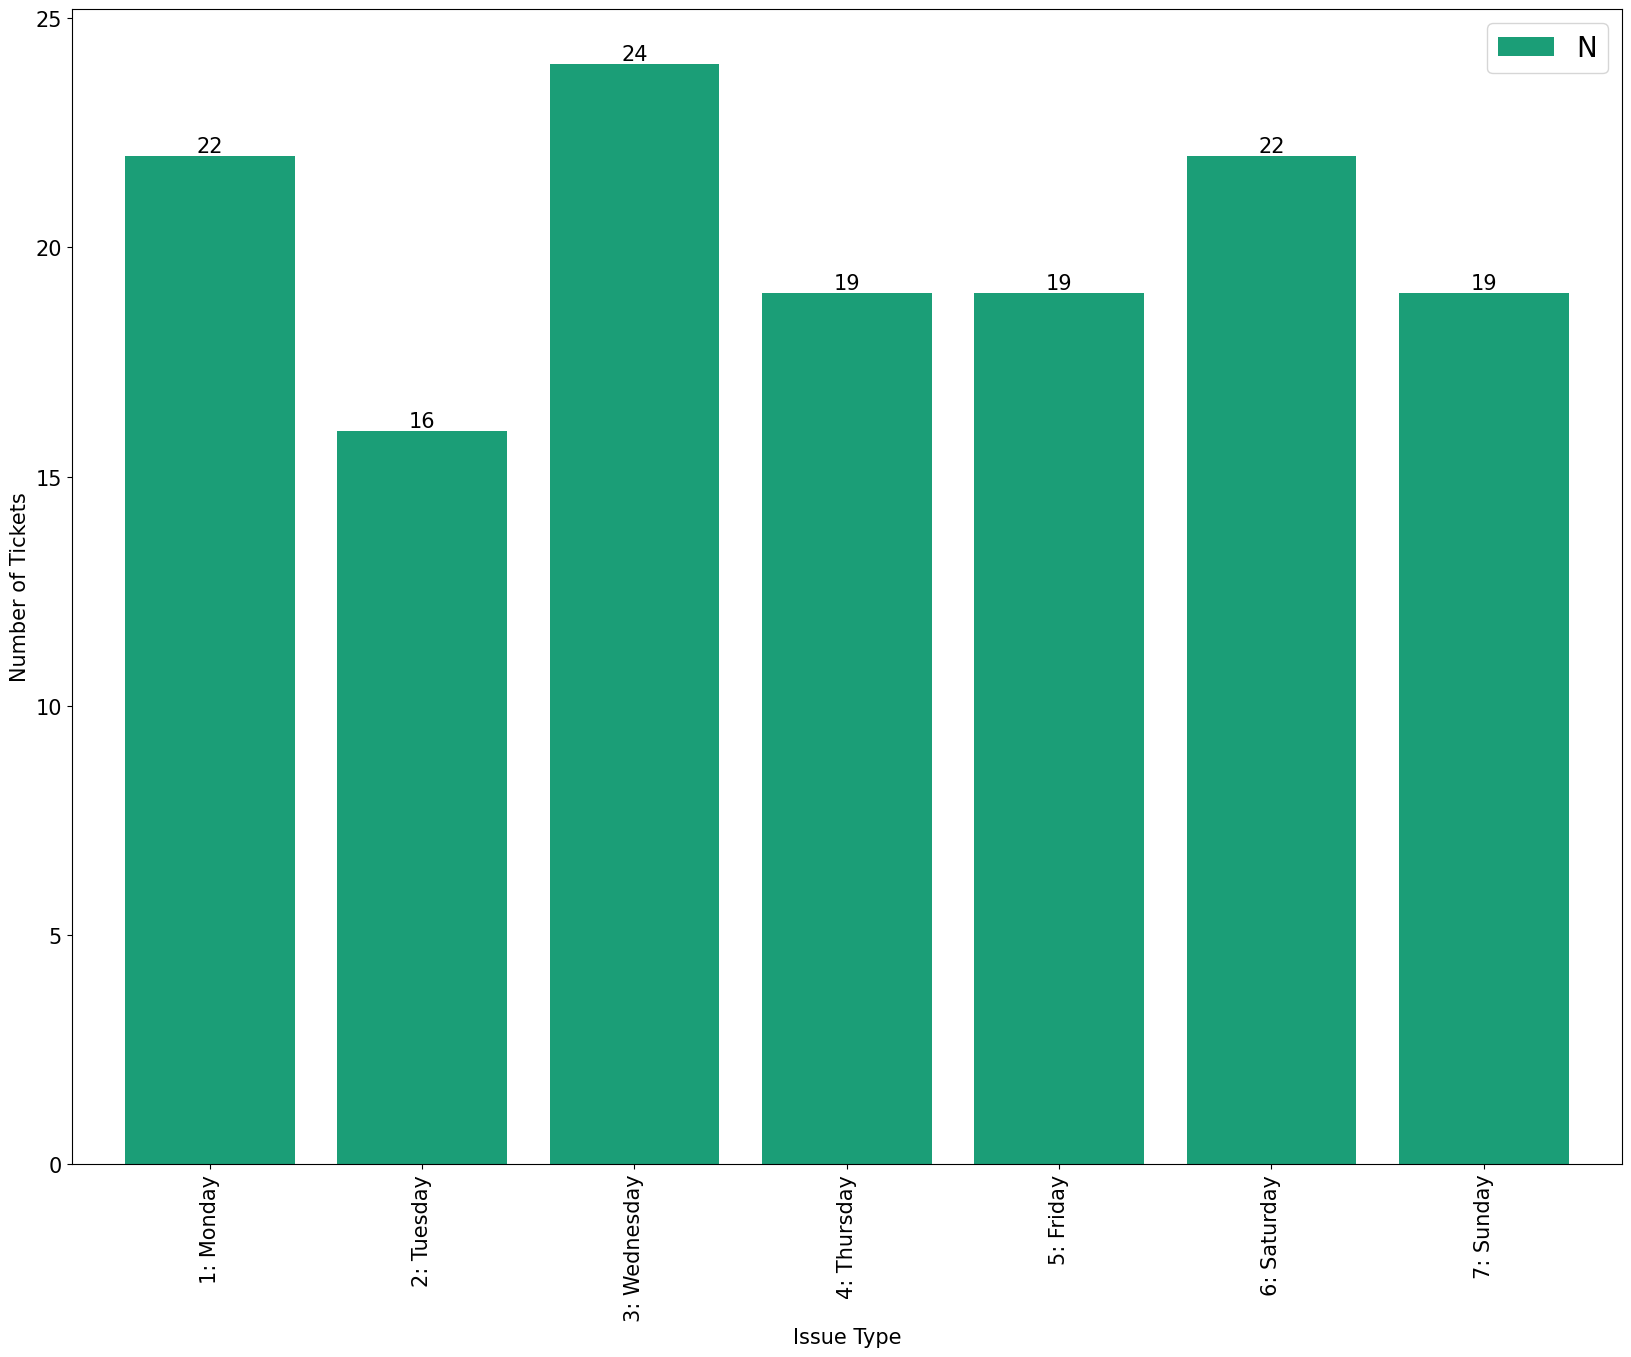

In [797]:
quarterly_daily = Quarterly_Deviation_db.groupby(['Opened Date']).count()
del quarterly_daily['Quarter']
del quarterly_daily['Site ID']

ax = quarterly_daily.plot.bar(figsize=(20,15),
                                width=0.8, 
                                colormap='Dark2',
                                fontsize=15,
                                align='center'
                               )

#Labeling x y axis
ax.set_ylabel('Number of Tickets',fontsize=15)
ax.set_xlabel('Issue Type',fontsize=15)

#Renaming the Legend
ax.legend('Number of Tickets',fontsize=20)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='edge',fontsize=15)

#ax.figure.savefig('2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png')

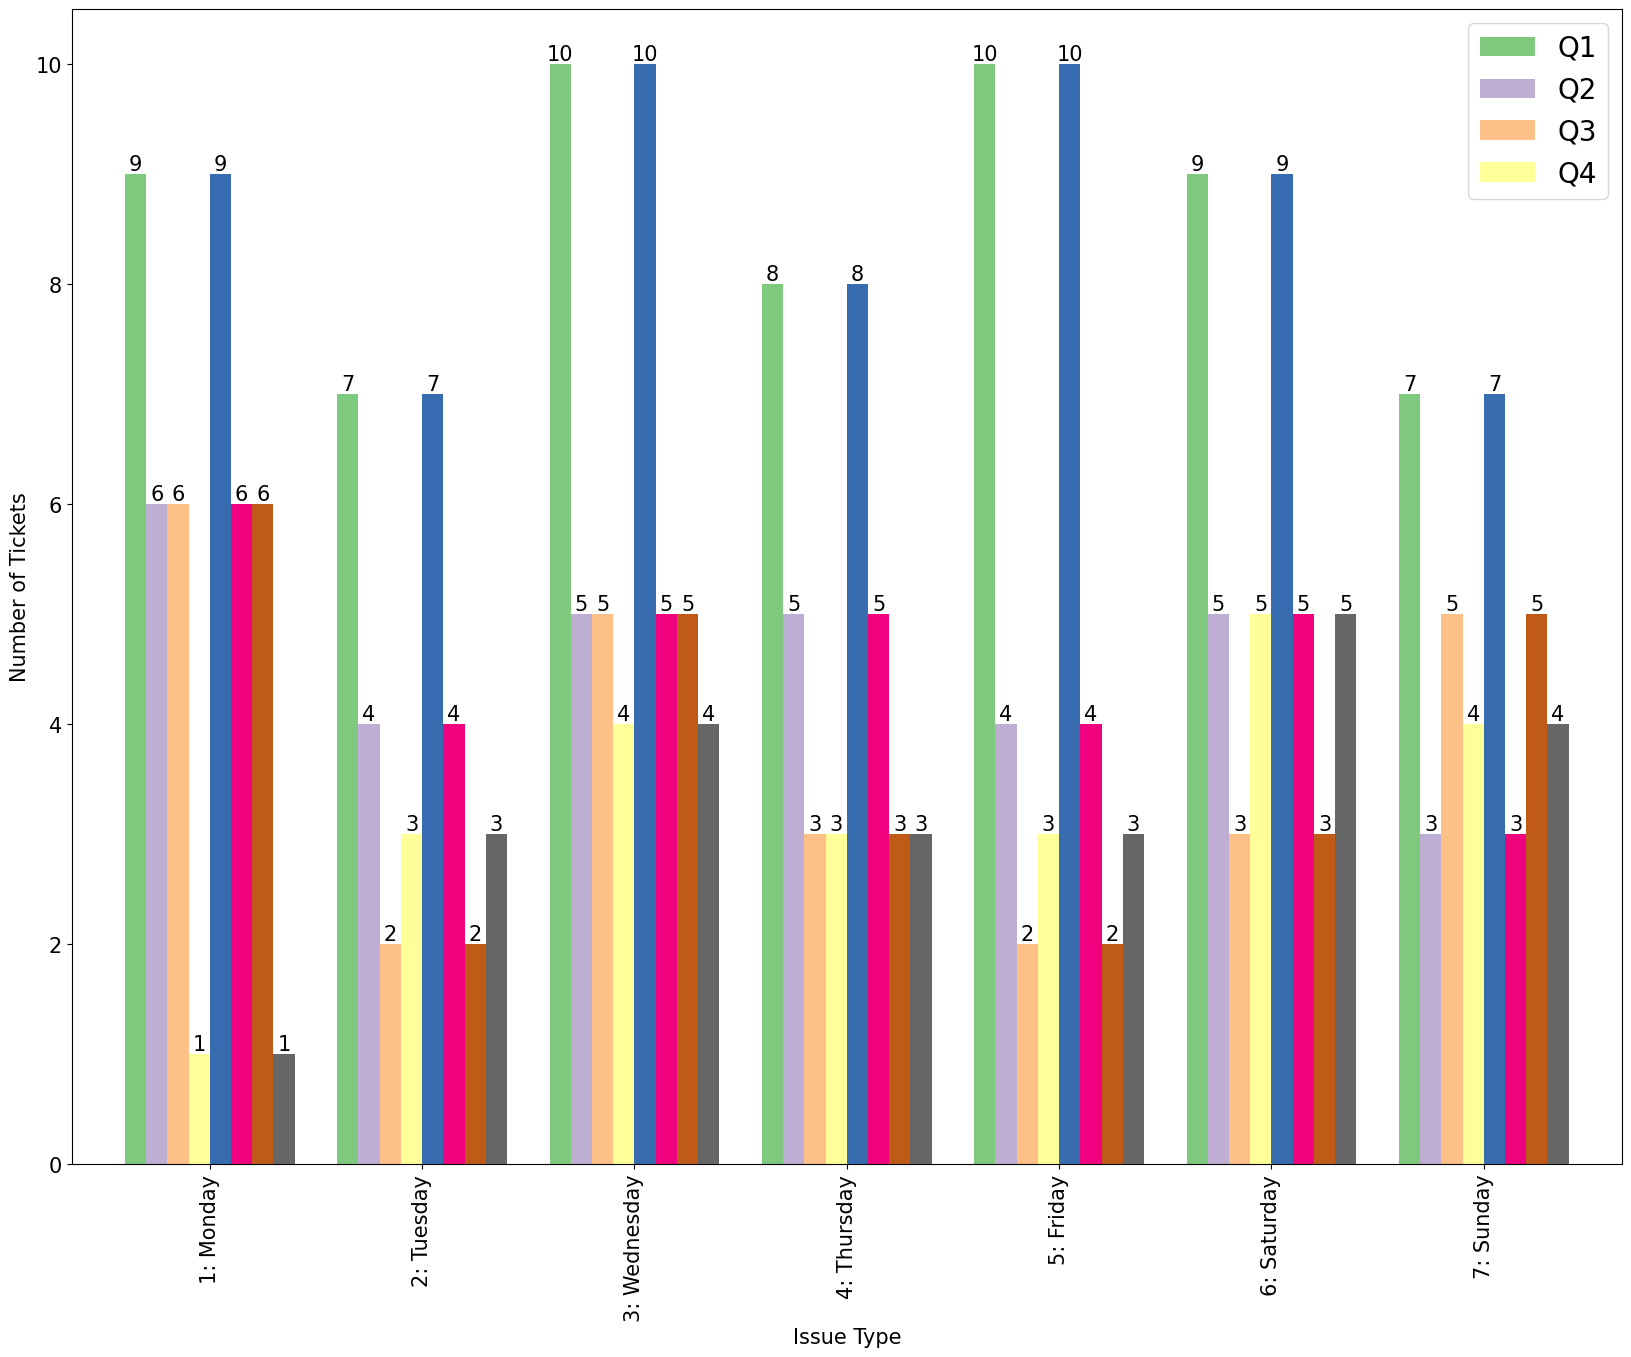

In [798]:
quarterly_daily = Quarterly_Deviation_db.groupby(['Opened Date','Quarter']).count()

quarterly_daily = quarterly_daily.pivot_table(index='Opened Date',columns='Quarter')
ax = quarterly_daily.plot.bar(figsize=(20,15),
                                width=0.8, 
                                colormap='Accent',
                                fontsize=15,
                                align='center'
                               )

#Labeling x y axis
ax.set_ylabel('Number of Tickets',fontsize=15)
ax.set_xlabel('Issue Type',fontsize=15)

#Renaming the Legend
ax.legend(['Q1','Q2','Q3','Q4'],fontsize=20)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='edge',fontsize=15)

#ax.figure.savefig('2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png')

In [799]:
quarterly_issues = Quarterly_Deviation_db.groupby(['Quarter','Type of Issue']).count()
del quarterly_issues['Opened Date']

quarterly_issues = quarterly_issues.pivot_table(index='Type of Issue', columns='Quarter')
quarterly_issues

Site ID            
Quarter                       Q1  Q2  Q3  Q4
Type of Issue                               
Blank Forms                    0  15  12   1
Collection Date > 7 days       7   0   0   0
Low volume                     4  13   0   0
Mismatch Information          14   0   0   0
Missing Info                   0   2   0  22
Only one viable BCT           24   0  14   0
Operator Error                11   2   0   0

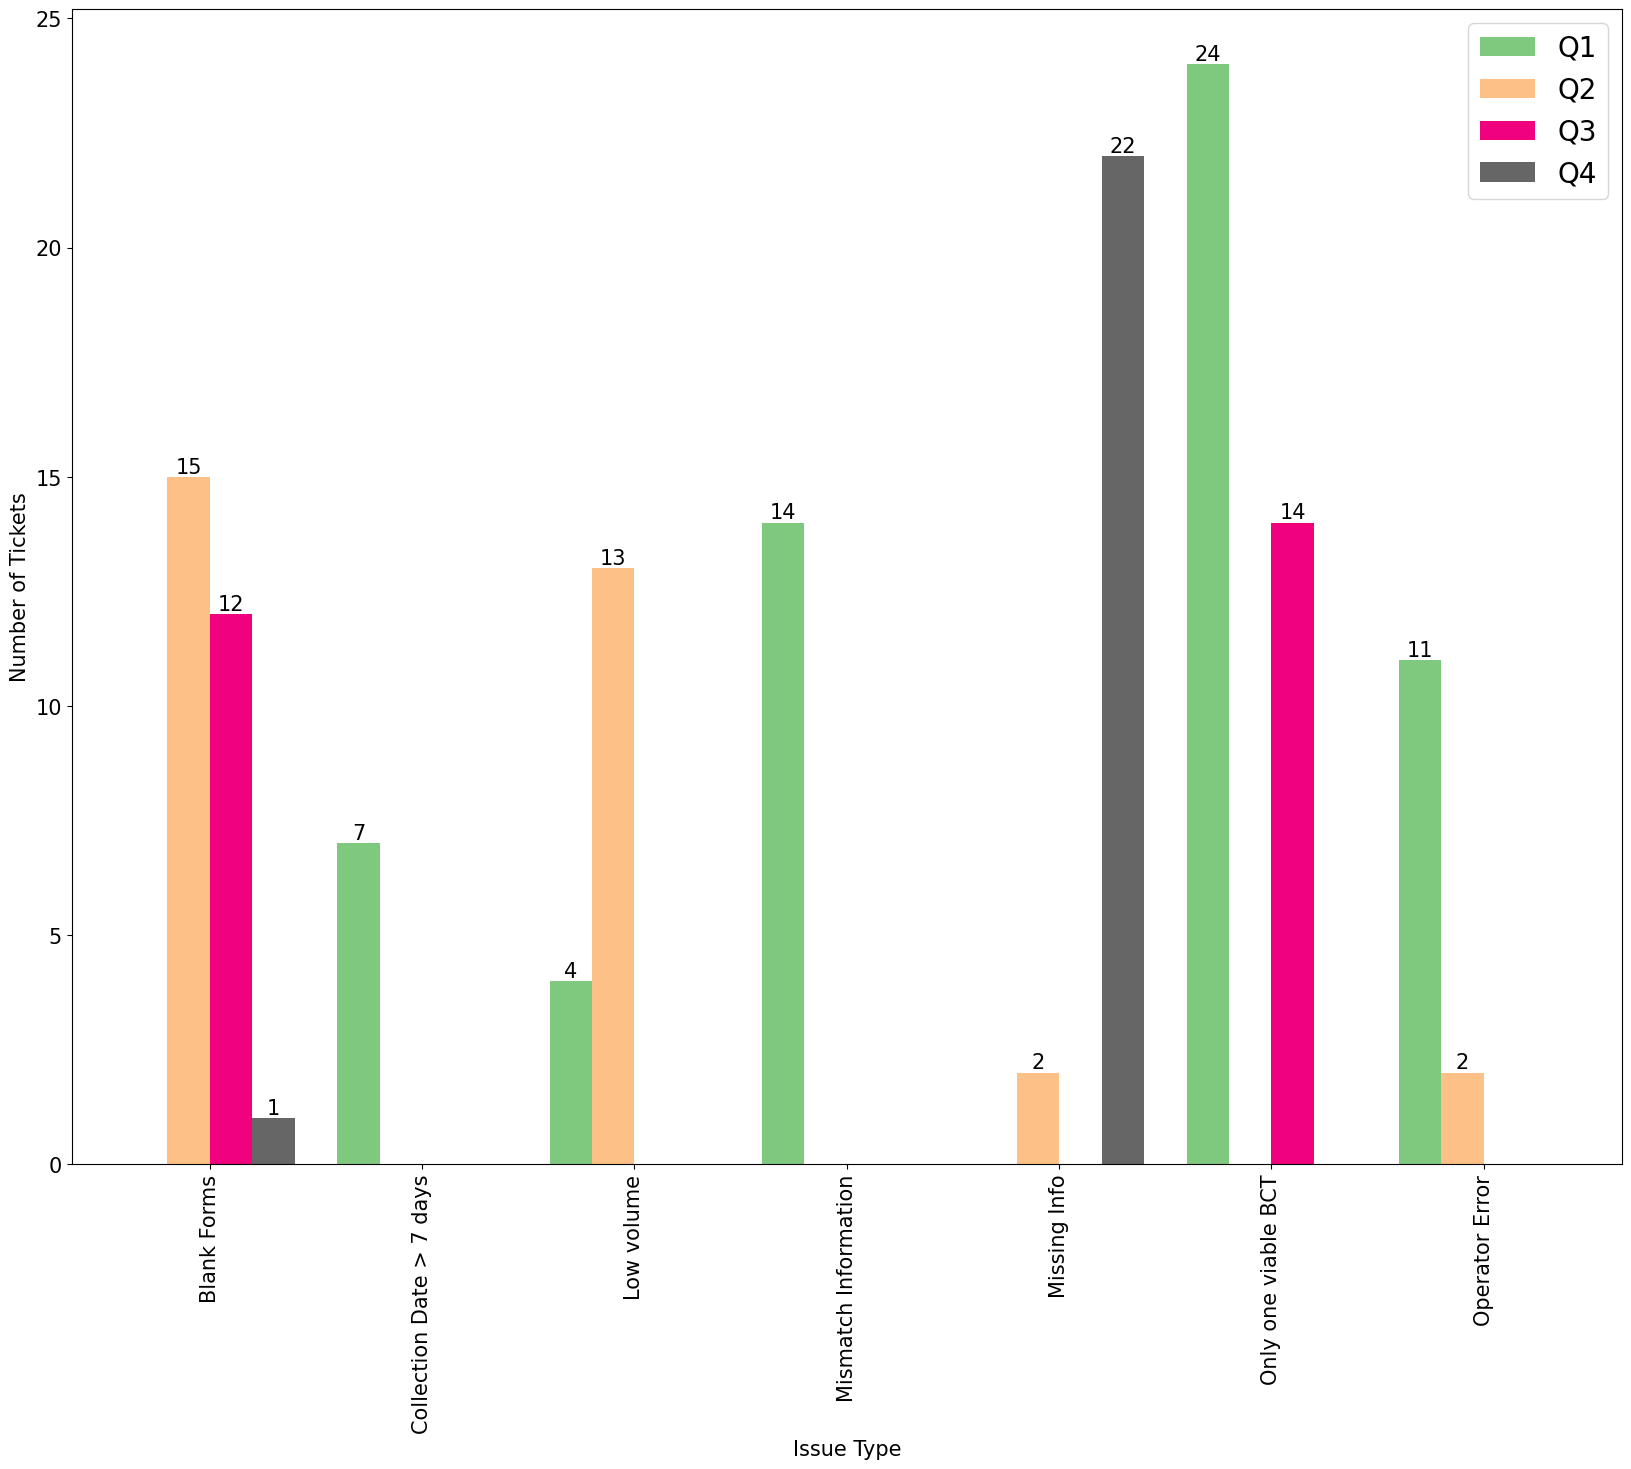

In [800]:
ax = quarterly_issues.plot.bar(figsize=(20,15),
                                width=0.8, 
                                colormap='Accent',
                                fontsize=15,
                                align='center'
                               )

#Labeling x y axis
ax.set_ylabel('Number of Tickets',fontsize=15)
ax.set_xlabel('Issue Type',fontsize=15)

#Renaming the Legend
ax.legend(['Q1','Q2','Q3','Q4'],fontsize=20)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='edge',fontsize=15)

#ax.figure.savefig('2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png')

<h2>Average Ticket Resolution Time</h2>

In [803]:
#Convert dataset to timeframe format in order to subtract columns
#Convert dataset to timeframe format
Study_Deviation_db["Opened Date"]= pd.to_datetime(Study_Deviation_db["Opened Date"], yearfirst=False, infer_datetime_format = True)
Study_Deviation_db["Opened Date"]= Study_Deviation_db["Opened Date"].dt.strftime('%d/%m/%Y')

Study_Deviation_db["Closed Date"]= pd.to_datetime(Study_Deviation_db["Closed Date"], yearfirst=False, infer_datetime_format = True)
Study_Deviation_db["Closed Date"]= Study_Deviation_db["Closed Date"].dt.strftime('%d/%m/%Y')

Study_Deviation_db['Resolution Time'] = (pd.to_datetime(Study_Deviation_db['Closed Date'])).sub(pd.to_datetime(Study_Deviation_db['Opened Date'])).dt.days

#Convert dtype to int
Study_Deviation_db['Resolution Time'] = Study_Deviation_db['Resolution Time'].astype(int)
Study_Deviation_db.head()

/tmp/ipykernel_14081/2558928373.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Study_Deviation_db["Opened Date"]= pd.to_datetime(Study_Deviation_db["Opened Date"], yearfirst=False, infer_datetime_format = True)
/tmp/ipykernel_14081/2558928373.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Study_Deviation_db["Closed Date"]= pd.to_datetime(Study_Deviation_db["Closed Date"], yearfirst=False, infer_datetime_format = True)
/tmp/ipykernel_14081/2558928373.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Study_Deviation_db['Resolution Time'] = (pd.to

,Site ID,Type of Issue,Opened Date,Closed Date,Resolution Time
0,101,Low volume,01/02/2023,01/03/2023,1
1,101,Low volume,01/03/2023,01/04/2023,1
2,101,Low volume,01/04/2023,01/05/2023,1
3,101,Low volume,06/02/2023,06/03/2023,1
4,101,Low volume,06/03/2023,06/04/2023,1


In [804]:
#Create a copy of the dataframe to continue editing it
resolution_time_db = Study_Deviation_db.copy()

#Delete unnecessary columns
del resolution_time_db['Opened Date']
del resolution_time_db['Closed Date']

#Change column type to int
resolution_time_db["Resolution Time"] = resolution_time_db["Resolution Time"].astype(int)

#Change the negative values to zero
resolution_time_db["Resolution Time"].loc[resolution_time_db["Resolution Time"]<0] = 0

#Change the values that are over 14 days to 15 days
resolution_time_db["Resolution Time"].loc[resolution_time_db["Resolution Time"]>15] = 15

resolution_time_db.head()

/tmp/ipykernel_14081/293072383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resolution_time_db["Resolution Time"].loc[resolution_time_db["Resolution Time"]<0] = 0
/tmp/ipykernel_14081/293072383.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resolution_time_db["Resolution Time"].loc[resolution_time_db["Resolution Time"]>15] = 15


,Site ID,Type of Issue,Resolution Time
0,101,Low volume,1
1,101,Low volume,1
2,101,Low volume,1
3,101,Low volume,1
4,101,Low volume,1


In [805]:
#Create a list of unique site IDs
Site_list = resolution_time_db['Site ID'].unique()

#Sort site IDS in ascending order
Site_list.sort()

Site_list

array(['101', '102', '103', '104', '108', '109', '110', '111', '112'],
      dtype=object)

In [806]:
Avg_resolution_time = []

for site in Site_list:
    x = resolution_time_db.loc[resolution_time_db['Site ID'] == site].mean(numeric_only=True)['Resolution Time']
    Avg_resolution_time.append(x)

Avg_resolution_time

[2.3333333333333335,
 1.8571428571428572,
 2.3666666666666667,
 3.272727272727273,
 7.0,
 10.0,
 2.0,
 10.0,
 7.235294117647059]

In [807]:
#Function for displaying a gradient come one side of the graph to the other
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

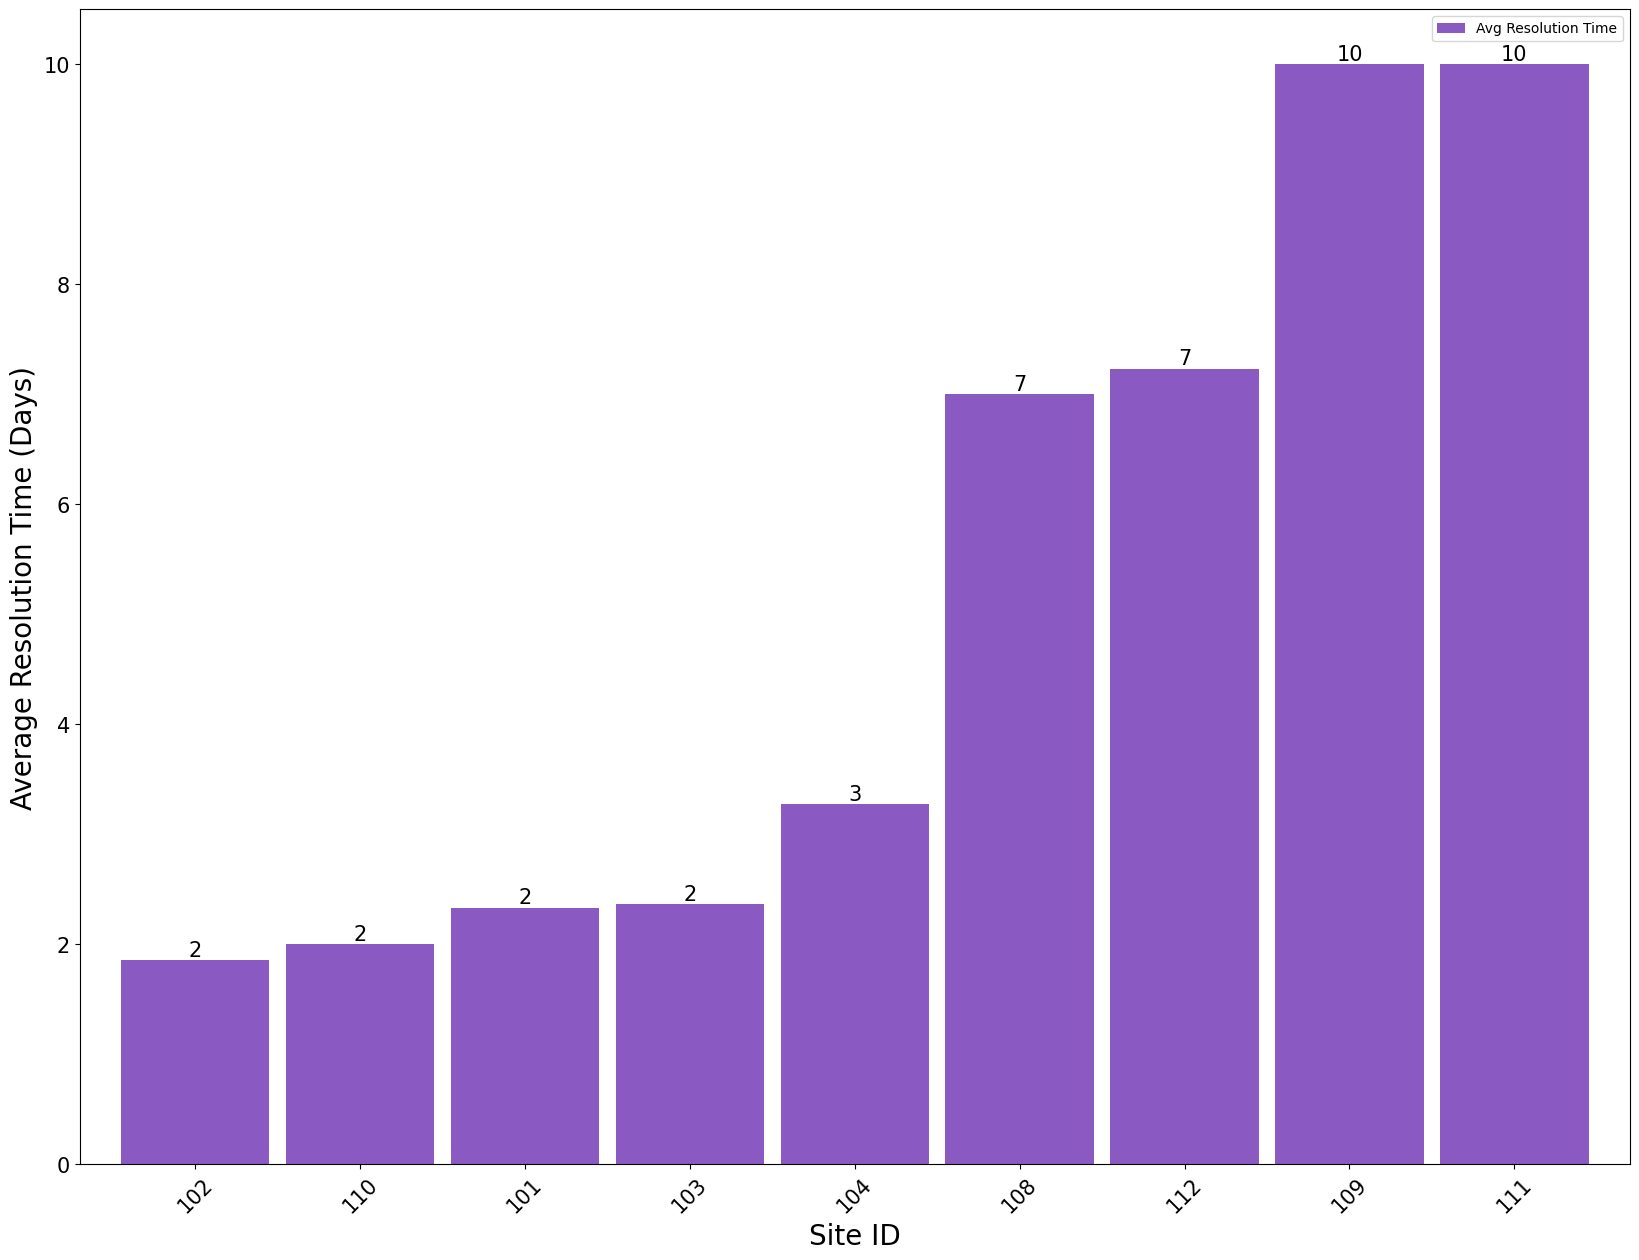

In [809]:
#Turning paired list data into dataframe
Avg_resolution_time_db = pd.DataFrame({
    'Site ID':Site_list,
    'Avg Resolution Time':Avg_resolution_time
})

#Sorting avg resolution time
Sort_avg_resolution_time_db = Avg_resolution_time_db.sort_values(by=Avg_resolution_time_db.columns[1],ascending=True)

#Create empty list. Obtain sorted list of site ID's through loop
sorted_site_ids = []

for i in Sort_avg_resolution_time_db['Site ID'].iloc[:len(Sort_avg_resolution_time_db)]:
    sorted_site_ids.append(i)

#Declaring colors for graph gradient
color1 = "#8A5AC2"
color2 = "#0000ff"


#Ploting dataframe
ax = Sort_avg_resolution_time_db.plot.bar(figsize=(20,15),
                                          width=0.9, 
                                          color = get_color_gradient(color1, color2, len(Sort_avg_resolution_time_db)),
                                          fontsize=15,
                                          align='center')

#Labeling x y axis
ax.set_ylabel('Average Resolution Time (Days)',fontsize=20)
ax.set_xlabel('Site ID',fontsize=20)

#Relabeling x_axis ticks
ax.set_xticklabels(sorted_site_ids, rotation=45)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='edge',fontsize=15)
#ax.figure.savefig('2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png')

plt.show()

In [818]:
#Find and store unique values into a list
issue_list = resolution_time_db['Type of Issue'].unique()

#Using the for loop, create dateframes based on issue type
issue_df_list = []
for x in issue_list:
    issue_df_list.append(resolution_time_db[(resolution_time_db['Type of Issue']) == x])


#Seprate the df in list
#Put the separated df into a dictionary with their names
issue_df = []
for i in range(len(issue_df_list)):
    #Generates the new name of each dataframe
    globals()[f"issue_df_{i}"] = issue_df_list[i]
    #Proven to work :)
    #print(f"issue_df_{i}")
    
    #Place the names of the df with its corresponding df
    intermid_dict = {f"issue_df_{i}":issue_df_list[i]}
    issue_df.append(intermid_dict)    

#Based on Site ID find the average solution time
for t in issue_df:
    #Change dtypes in order to calculate mean
    #globals()[f"issue_data{t}"] = pd.DataFrame.from_dict(issue_df[t])
    #avg_res_time_[t] = issue_df['Resolution Time'].mean()
    f"issue_data{t}"
    
 #   issue_df['Avg Resolution Time'][t] = issue_df['Resolution Time'][t].mean()
  #  print(avg_res_time_[row])
    


#for d in issue_df_list:
#    intermediate_df = pd.DataFrame(d)
    #issue_df = issue_df.append(intermediate_df)

issue_df_0

,Site ID,Type of Issue,Resolution Time
0,101,Low volume,1
1,101,Low volume,1
2,101,Low volume,1
3,101,Low volume,1
4,101,Low volume,1
5,101,Low volume,1
6,101,Low volume,1
7,101,Low volume,1
8,102,Low volume,1
9,102,Low volume,1


<h2>Ticket Creation Rate by Site</h2>

In [824]:
#Copy dataset for analysis
creation_rate_db = Study_Deviation_db.copy()

#Reset index
Study_Sites_reset = Study_Sites.reset_index(col_level=1)

Study_Sites_reset.head()

,0,1
0,101,835
1,102,557
2,103,501
3,104,946
4,108,558


In [825]:
#Get list of site IDs
list_sites = creation_rate_db['Site ID'].unique()

#Create empty list to save data into
num_ticket_list = []
total_num_samples = []

#Loop through column so that it counts the number of times a site filed a ticket
for site in list_sites:
    x = creation_rate_db.loc[creation_rate_db['Site ID'] == site].count(numeric_only=None)['Site ID']
    num_ticket_list.append(x)

for site in list_sites:
    x = Study_Sites_reset.loc[Study_Sites_reset[0] == site].sum(numeric_only=None)[1]
    total_num_samples.append(x)

#Create a dataframebased on newly created lists
rate_db = pd.DataFrame({
    'Site ID': list_sites,
    'Number of Deviations': num_ticket_list,
    'Total Samples From Site' : total_num_samples
})

rate_db.head()

,Site ID,Number of Deviations,Total Samples From Site
0,101,21,835
1,102,14,557
2,103,30,501
3,104,44,946
4,108,6,558


In [826]:
#Create new column for percentage rate
rate_db['Percentage Rate'] = round(100*(rate_db['Number of Deviations']/rate_db['Total Samples From Site']),2)

#Deleting unnecessary columns
del rate_db['Number of Deviations']
del rate_db['Total Samples From Site']

#Sort values by percentage rate
rate_sort_db = rate_db.sort_values(by=rate_db.columns[1],ascending=True)

rate_sort_db

,Site ID,Percentage Rate
5,109,0.04
6,111,0.16
8,110,0.41
7,112,0.64
4,108,1.08
0,101,2.51
1,102,2.51
3,104,4.65
2,103,5.99


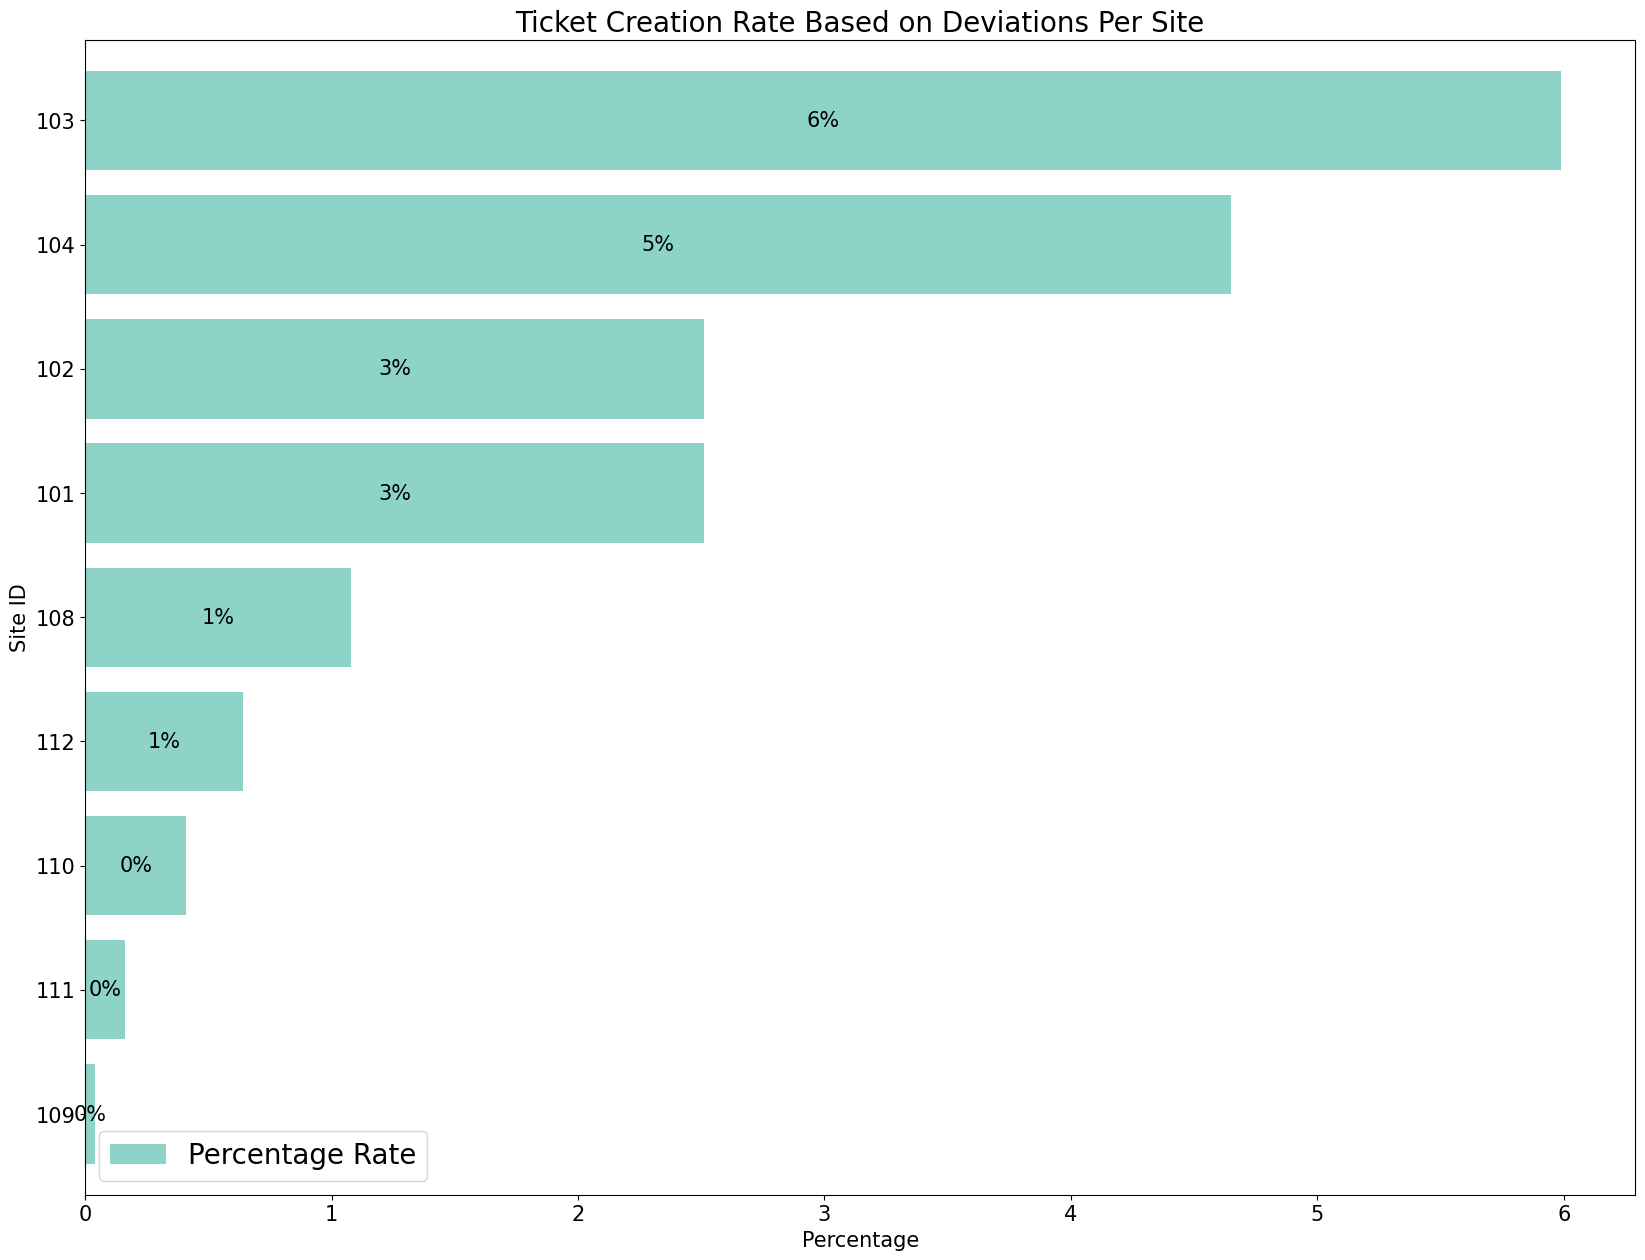

In [827]:
ax = rate_sort_db.plot.barh(stacked = True,
                       figsize=(20,15),
                       width=0.8,
                       colormap='Set3',
                       fontsize=15,
                       align='center')

#Labeling x y axis
ax.set_ylabel('Site ID',fontsize=15)
ax.set_xlabel('Percentage',fontsize=15)

#Title graph
plt.title(f"Ticket Creation Rate Based on Deviations Per Site",fontsize=20)

#Relabing y axis ticks
ax.set_yticklabels(rate_sort_db['Site ID'].unique())

#Renaming the Legend
ax.legend(fontsize=20)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}%' if x>0 else'', label_type='center',fontsize=15)
